## This is HNA or Hybrid SFLA-CSO Network Aligner program, and implemented by Elham Mahdipour that is Ph.D. Candidate of Artificial Intelligence at Yazd University, Yazd, Iran. 
### All copyright reserved by the author.

You can run the program from first to end and see all the results, but since the population generation process can take a time depended on the node numbers of networks, you can use the populations stored in each program. We saved the populations as the pair of related species that you can see in the input folder and load them on program, such as "ce-sc-pop.pickle". Therefore, you must run follow steps: 1) Run all cells in "Load Graphs", "Swap Graphs", "Define Target Graph",and "Compute Score for create similarity matrix" sections. 2) If you will use saved population, please upload related pickle on root of jupyter notebook, then go "load population" cell and run them; else, please run "multi tasking for initial population", "multi processing for speed up", and "Initialization such as MeAlign" cells. 3) Run all remains cells to create results.

# Load Graphs 

In [1]:
import pickle
with open('sc-sc-weighted.pickle', 'rb') as f:
    sclist = pickle.load(f)

In [2]:
with open('ce-ce-weighted.pickle', 'rb') as f:
    celist = pickle.load(f)

In [3]:
import networkx as nx
G1=nx.Graph()
for i in range(len(sclist)):
    if G1.has_node(sclist[i][0])==False:
        G1.add_node(sclist[i][0])
    if G1.has_node(sclist[i][1])==False:
        G1.add_node(sclist[i][1])
    G1.add_edge(sclist[i][0],sclist[i][1],weight=sclist[i][2])
G1

In [4]:
G1.number_of_nodes()

5513

In [5]:
G1.number_of_edges()

16185

In [6]:
len(G1)

5513

In [7]:
G2=nx.Graph()
for i in range(len(celist)):
    if G2.has_node(celist[i][0])==False:
        G2.add_node(celist[i][0])
    if G2.has_node(celist[i][1])==False:
        G2.add_node(celist[i][1])
    G2.add_edge(celist[i][0],celist[i][1],weight=celist[i][2])
G2

In [8]:
print('len G1:', len(G1))

print('len G2:',len(G2))

len G1: 5513
len G2: 2990


# Swap graphs if len G1 > len G2

In [9]:
### Check and Swap if G1 > G2 ###
if len(G1)>len(G2):
    temp=G1
    G1=G2
    G2=temp
print(len(G1))
print(len(G2))

2990
5513


In [10]:
ed1=G1.edges()

In [11]:
nd1=G1.nodes()

In [12]:
ed2=G2.edges()

In [13]:
len(ed2)

16185

In [14]:
nd2=G2.nodes()

In [15]:
len(ed1)

10078

In [16]:
len(nd1)

2990

In [17]:
el1=list(ed1)
el2=list(ed2)

In [18]:
nd1=list(nd1)
nd2=list(nd2)

In [19]:
degG1 = [val for (node, val) in G1.degree()]


In [20]:
degG2 = [val for (node, val) in G2.degree()]

# Define Target Graph

In [21]:
G_target_na=nx.read_weighted_edgelist('ce-sc.evals')
G_target_na  

In [22]:
gtnode=list(G_target_na.nodes())
print(len(gtnode))
g_t_node=[]
for i in range(len(gtnode)):
    if (G1.has_node(gtnode[i])==False and G2.has_node(gtnode[i])==False):
        continue
    else:
        g_t_node.append(gtnode[i])

#print(gtnode)
print(len(g_t_node))

8246
4284


In [23]:
G_target=nx.Graph()
for i in range(len(g_t_node)):
    for j in range(len(g_t_node)):
        if G_target_na.has_node(g_t_node[i])==False:
            G_target.add_node(g_t_node[i])
        if G_target_na.has_node(g_t_node[j])==False:
            G_target.add_node(g_t_node[j])
        if G_target_na.has_edge(g_t_node[i],g_t_node[j]):
            a=list(G_target_na.get_edge_data(g_t_node[i],g_t_node[j]).values())
            #b=list(a[0][0].values())
            G_target.add_edge(g_t_node[i],g_t_node[j],weight=a[0])
G_target

In [24]:
len(G_target)

2934

In [25]:
G_target_na=G_target

In [26]:
G_target_na.edges()

EdgeView([('sc4955', 'ce17241'), ('sc4955', 'ce17063'), ('sc4955', 'ce16627'), ('sc4955', 'ce15708'), ('sc4955', 'ce17146'), ('ce17241', 'sc3940'), ('ce17241', 'sc5287'), ('ce17241', 'sc5262'), ('ce17241', 'sc4343'), ('ce17241', 'sc5106'), ('ce17241', 'sc4648'), ('ce17241', 'sc5483'), ('ce17241', 'sc5348'), ('ce17241', 'sc5352'), ('ce17241', 'sc4998'), ('ce17241', 'sc5238'), ('ce17241', 'sc5171'), ('ce17241', 'sc4683'), ('ce17063', 'sc3940'), ('ce17063', 'sc5287'), ('ce17063', 'sc5262'), ('ce17063', 'sc4343'), ('ce17063', 'sc5106'), ('ce17063', 'sc4648'), ('ce17063', 'sc5348'), ('ce17063', 'sc5352'), ('ce17063', 'sc4998'), ('ce17063', 'sc5238'), ('ce17063', 'sc5171'), ('ce17063', 'sc4683'), ('ce16627', 'sc3940'), ('ce16627', 'sc5287'), ('ce16627', 'sc5262'), ('ce16627', 'sc4343'), ('ce16627', 'sc5106'), ('ce16627', 'sc4648'), ('ce16627', 'sc5348'), ('ce16627', 'sc5352'), ('ce16627', 'sc4998'), ('ce16627', 'sc5238'), ('ce16627', 'sc5171'), ('ce16627', 'sc4683'), ('ce15708', 'sc3940'), (

# Compute Score for create similarity matrix
برای ساخت هسته اولیه جهت تولید جمعیت بایدامتیاز اولیه و ماتریس شباهت را بسازیم. این امتیازات را بر اساس پیج رنک، میزان تفاوت درجات رئوس در دو گراف، ضریب یال ورودی، تفاوت بین ضرایب یال های دو گراف و خوشه بندی آنها و شباهت توالی (امتیاز بلست) می سازیم که برگرفته از مقاله می-الاین است 

In [27]:
def deg_Diff(G1,G2):
    Degree_Difference=np.zeros((len(G1),len(G2)))
    for i in range(len(G1)):
        for j in range(len(G2)):
            Degree_Difference[i][j]=abs(degG1[i]-degG2[j])/max(degG1[i],degG2[j])
    return Degree_Difference

In [28]:
def score_pageRank(X):
    a=nx.pagerank(X)
    return a

In [29]:
def coefficient_pagerank(x,y):  #x is G1, y is G2
   # print(len(x))
    p1=score_pageRank(x)
    b=p1.values()
    pr1=list(b)
    p2=score_pageRank(y)
    c=p2.values()
    pr2=list(c)
    pr=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            #print(pr1[i],pr2[j])
            pr[i][j]=abs(pr1[i]-pr2[j])/max(pr1[i],pr2[j])   #minimum pr is maximum similarity of topology 
    return pr

In [30]:
def coefficient_edges(index_node, G, GraphNumber):
    if GraphNumber==1:
        sum_edge=0        
        for i in G.neighbors(nd1[index_node]):                       
            sum_edge=sum_edge+degG1[nd1.index(i)]
        #print(sum_edge)
        temp=(degG1[index_node]-1) if degG1[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG1[index_node]*temp)
    else:
        sum_edge=0        
        for i in G.neighbors(nd2[index_node]):                       
            sum_edge=sum_edge+degG2[nd2.index(i)]
        #print(sum_edge)
        temp=(degG2[index_node]-1) if degG2[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG2[index_node]*temp)
    return coeff_node
    

In [31]:
def compute_Ea(G1,G2):
    Ea_G1=np.zeros(len(G1))
    Ea_G2=np.zeros(len(G2))
    for i in range(len(G1)):
        Ea_G1[i]=coefficient_edges(i, G1, 1)
    for j in range(len(G2)):
        Ea_G2[j]=coefficient_edges(j,G2,2)
    ea=[Ea_G1, Ea_G2]
    return(ea)

In [32]:
# compute relative clustering coefficient difference between node a (in G1) and node b (in G2)
def CD(G1, G2):
    cd=np.zeros((len(G1),len(G2)))
    EA=compute_Ea(G1,G2)
    #print(EA[0])      #Ea for G1
    #print("===================")
    #print(EA[1])      #Ea for G2
    for i in range(len(G1)):
        for j in range(len(G2)):
            cd[i,j]=abs(EA[0][i]-EA[1][j])/max(EA[0][i],EA[1][j])
    return cd

In [33]:
def sequence_score(x,y):
    seq=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            q1=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
            if q1==None:
                c=0
            else:
                c=list(q1.values())
                c=c[0]
            seq[i][j]=c    
            
    return seq

In [34]:
def compute_score(G1,G2):
    coeff_pr=coefficient_pagerank(G1,G2)
    dd=deg_Diff(G1,G2)
    cd=CD(G1,G2)
    seq_sc=sequence_score(G1,G2)
    
    alpha=0.1
    betta=0.2
    gamma=0.2
    zetta=1-alpha-betta-gamma
    s=alpha*(1-coeff_pr)+betta*(1-dd)+gamma*(1-cd)+zetta*seq_sc
    return s

In [35]:
import numpy as np
m=compute_score(G1,G2)
n=m


# multi tasking for initial population

In [36]:
def task1(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task1')
    for z1 in range(int(len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
  

In [37]:
def task2(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task2')
    for z1 in range(int(len_G1/3),int(2*len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

In [38]:
def task3(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task3')
    for z1 in range(int(2*len_G1/3),len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

# multi processing for speed up

In [39]:
def fun_rand_permute(len_G1, base_permute, rand_permutation):
    for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1)
    #print(rand_permutation)

# Initialization such as MeAlign

In [40]:
#%%prun
import random
import threading

len_pop=300 
len_G1=len(G1)
len_G2=len(G2)
similarity_score_matrix=np.zeros((len_G1,len_G1))
sim_score_matrix=np.zeros((len_G1,len_G1))
pop=np.zeros((len_pop,len_G1,2))
index_score=np.zeros(len_G1)
rand_permutation=np.zeros((len_G1,len_G1))
base_permute = [j for  j in range(0, len_G2)]

for i in range(len_pop):  
    print('wait')
    if i>0:
        do_not_permute = set(base_permute)-set(index_score)#[item for item in base_permute if item not in index_score]
        #print(do_not_permute)
        #print(len(base_permute))
        base_permute.extend(do_not_permute)
        #print(len(do_not_permute))
        #print(len(base_permute))
        #print(base_permute)
     
    t = threading.Thread(target=fun_rand_permute, args=(len_G1,base_permute, rand_permutation,))
    t.start() 
    t.join()
    #print(rand_permutation)
    
    """for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1) """               
    print('in for loop')
    """for z1 in range(len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])"""
     
    
      
    t1 = threading.Thread(target=task1, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,)) 
    t2 = threading.Thread(target=task2, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    t3 = threading.Thread(target=task3, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    # starting thread 1 
    t1.start() 
    # starting thread 2 
    t2.start() 
    # starting thread 3 
    t3.start() 
    # wait until thread 1 is completely executed 
    t1.join() 
    # wait until thread 2 is completely executed 
    t2.join() 
    # wait until thread 3 is completely executed 
    t3.join()
    # both threads completely executed 
    print("Done!, i=",i) 
    
pop

wait
in for loop
task1
task2
task3
Done!, i= 0
wait
in for loop
task1
task2task3

Done!, i= 1
wait
in for loop
task1
task2task3

Done!, i= 2
wait
in for loop
task1
task2
task3
Done!, i= 3
wait
in for loop
task1
task2
task3
Done!, i= 4
wait
in for loop
task1
task2
task3
Done!, i= 5
wait
in for loop
task1
task2
task3
Done!, i= 6
wait
in for loop
task1
task2
task3
Done!, i= 7
wait
in for loop
task1
task2
task3
Done!, i= 8
wait
in for loop
task1
task2
task3
Done!, i= 9
wait
in for loop
task1
task2
task3
Done!, i= 10
wait
in for loop
task1
task2
task3
Done!, i= 11
wait
in for loop
task1
task2
task3
Done!, i= 12
wait
in for loop
task1
task2
task3
Done!, i= 13
wait
in for loop
task1
task2task3

Done!, i= 14
wait
in for loop
task1
task2
task3
Done!, i= 15
wait
in for loop
task1
task2
task3
Done!, i= 16
wait
in for loop
task1
task2
task3
Done!, i= 17
wait
in for loop
task1
task2
task3
Done!, i= 18
wait
in for loop
task1
task2
task3
Done!, i= 19
wait
in for loop
task1
task2
task3
Done!, i= 20
wa

Done!, i= 169
wait
in for loop
task1
task2
task3
Done!, i= 170
wait
in for loop
task1
task2
task3
Done!, i= 171
wait
in for loop
task1
task2
task3
Done!, i= 172
wait
in for loop
task1
task2
task3
Done!, i= 173
wait
in for loop
task1
task2
task3
Done!, i= 174
wait
in for loop
task1
task2
task3
Done!, i= 175
wait
in for loop
task1
task2
task3
Done!, i= 176
wait
in for loop
task1
task2
task3
Done!, i= 177
wait
in for loop
task1
task2
task3
Done!, i= 178
wait
in for loop
task1
task2
task3
Done!, i= 179
wait
in for loop
task1
task2
task3
Done!, i= 180
wait
in for loop
task1
task2
task3
Done!, i= 181
wait
in for loop
task1
task2
task3
Done!, i= 182
wait
in for loop
task1
task2
task3
Done!, i= 183
wait
in for loop
task1
task2
task3
Done!, i= 184
wait
in for loop
task1
task2
task3
Done!, i= 185
wait
in for loop
task1
task2
task3
Done!, i= 186
wait
in for loop
task1
task2
task3
Done!, i= 187
wait
in for loop
task1
task2
task3
Done!, i= 188
wait
in for loop
task1
task2
task3
Done!, i= 189
wait
i

array([[[0.000e+00, 7.630e+02],
        [1.000e+00, 4.310e+02],
        [2.000e+00, 4.310e+02],
        ...,
        [2.987e+03, 5.198e+03],
        [2.988e+03, 4.819e+03],
        [2.989e+03, 3.769e+03]],

       [[0.000e+00, 3.640e+02],
        [1.000e+00, 3.480e+02],
        [2.000e+00, 3.480e+02],
        ...,
        [2.987e+03, 4.747e+03],
        [2.988e+03, 5.372e+03],
        [2.989e+03, 1.447e+03]],

       [[0.000e+00, 1.928e+03],
        [1.000e+00, 4.310e+02],
        [2.000e+00, 4.310e+02],
        ...,
        [2.987e+03, 3.689e+03],
        [2.988e+03, 3.124e+03],
        [2.989e+03, 8.060e+02]],

       ...,

       [[0.000e+00, 3.640e+02],
        [1.000e+00, 3.660e+02],
        [2.000e+00, 4.310e+02],
        ...,
        [2.987e+03, 2.425e+03],
        [2.988e+03, 2.932e+03],
        [2.989e+03, 3.556e+03]],

       [[0.000e+00, 3.570e+02],
        [1.000e+00, 1.946e+03],
        [2.000e+00, 4.310e+02],
        ...,
        [2.987e+03, 2.382e+03],
        [2.988e+03

# Save population

In [33]:
import pickle
with open('ce-sc-base_permute.pickle', 'wb') as f:
    pickle.dump(base_permute, f)

In [34]:
import pickle
with open('ce-sc-pop.pickle', 'wb') as f:
    pickle.dump(pop, f)

## You can load population if there is save population such as 'ce-sc-pop.pickle'

# Load population

In [ ]:
with open('ce-sc-base_permute', 'rb') as f:
    base_permute = pickle.load(f)

In [ ]:
with open('ce-sc-pop.pickle', 'rb') as f:
    pop = pickle.load(f)

# compute measure edge correctness, ics, nc and s3

In [41]:
def induced_function_for_initialpop(sub_pop):
    num_induced=0
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    for i in range(len(sub_g2)):
        for j in range(i,len(sub_g2)):
            if G2.has_edge(nd2[int(sub_g2[i])], nd2[int(sub_g2[j])]):
                num_induced=num_induced+1
    return num_induced

In [42]:
score_ec=np.zeros(len_pop)
score_ics=np.zeros(len_pop)
score_s3=np.zeros(len_pop)
score_nc=np.zeros(len_pop)
num_seq=np.zeros(len_pop)
score_ncorectness=np.zeros(len_pop)

p=pop 
len_G1=len(G1)
map_items=[] #np.zeros((len_pop,len_G1,2))

for i in range(len(p)):
    ec=0
    nc=0
    sub_pop=p[i]
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    num_induced=induced_function_for_initialpop(sub_pop) 
    #print("number induced for i=",i," is: ",num_induced)
    
    for j in range(len_G1):                           
         if G_target_na.has_edge(nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]):
            num_seq[i]+=1  # create sequence matrix 
            map_items.append([nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]])
            ec=ec+1            
            nc=nc+2
                 
    score_ec[i]=ec/G1.number_of_edges()*100
    score_ics[i]=ec/num_induced*100
    score_s3[i]=ec/(G1.number_of_edges()+num_induced-ec)*100
    score_nc[i]=nc/G1.number_of_nodes()*100 
    score_ncorectness[i]=(nc/G_target_na.number_of_nodes())*100
    """if (score_nc[i] > 100):
        score_nc[i]=100
    if (score_ec[i] > 100):
        score_ec[i]=100
    if (score_ics[i] > 100):
        score_ics[i]=100
    if (score_s3[i] > 100):
        score_s3[i]=100
    if ( score_ncorectness[i]>100):
         score_ncorectness[i]=100"""

print('ec')
print(score_ec)
print('ics')
print(score_ics)
print('s3')
print(score_s3)
print('nc',score_nc)
print('node correctness: ',  score_ncorectness)

ec
[9.46616392 9.02956936 8.51359397 8.56320699 8.68227823 8.6028974
 8.63266521 8.53343917 8.62274261 8.70212344 8.65251042 8.47390355
 8.6028974  8.57312959 8.55328438 8.49374876 8.55328438 8.71204604
 8.73189125 8.72196864 8.64258782 8.82119468 8.63266521 8.35483231
 8.68227823 8.69220083 8.48382616 8.39452272 8.38460012 8.46398095
 8.39452272 8.5929748  8.79142687 8.52351657 8.61282    8.45405834
 8.83111729 8.70212344 8.40444533 8.46398095 8.47390355 8.91049811
 8.50367136 8.64258782 8.63266521 8.49374876 8.45405834 8.73189125
 8.75173646 8.31514189 8.61282    8.47390355 8.44413574 8.58305219
 8.36475491 8.5929748  8.52351657 8.51359397 8.55328438 8.65251042
 8.3449097  8.54336178 8.58305219 8.64258782 8.56320699 8.3449097
 8.61282    8.64258782 8.5929748  8.62274261 8.48382616 8.46398095
 8.50367136 8.40444533 8.3349871  8.49374876 8.53343917 8.51359397
 8.61282    8.50367136 8.44413574 8.70212344 8.44413574 8.43421314
 8.48382616 8.47390355 8.41436793 8.55328438 8.84103989 8.721

## number of matched sequences 

In [43]:
num_seq

array([954., 910., 858., 863., 875., 867., 870., 860., 869., 877., 872.,
       854., 867., 864., 862., 856., 862., 878., 880., 879., 871., 889.,
       870., 842., 875., 876., 855., 846., 845., 853., 846., 866., 886.,
       859., 868., 852., 890., 877., 847., 853., 854., 898., 857., 871.,
       870., 856., 852., 880., 882., 838., 868., 854., 851., 865., 843.,
       866., 859., 858., 862., 872., 841., 861., 865., 871., 863., 841.,
       868., 871., 866., 869., 855., 853., 857., 847., 840., 856., 860.,
       858., 868., 857., 851., 877., 851., 850., 855., 854., 848., 862.,
       891., 879., 847., 885., 871., 890., 855., 853., 868., 871., 868.,
       857., 873., 865., 863., 885., 863., 849., 857., 879., 864., 875.,
       855., 859., 870., 859., 861., 889., 857., 857., 872., 878., 865.,
       834., 856., 852., 868., 873., 872., 861., 867., 871., 871., 855.,
       860., 863., 886., 875., 872., 865., 863., 846., 868., 857., 833.,
       857., 880., 864., 842., 860., 874., 868., 85

## compute topology score

In [44]:
#compute Final Score
tscore=np.zeros(len_pop)
for i in range(len(p)):
    tscore[i]=(0.25*(score_ec[i]/G1.number_of_edges())+0.25*(score_s3[i]/(G1.number_of_edges()+score_ics[i]-score_ec[i]))+0.25*(score_ics[i]/2*G1.number_of_edges())+0.25*(score_nc[i]/(G1.number_of_nodes()+G2.number_of_nodes())))
print(tscore)

[33711.12431682 33266.76075294 29841.67793375 29631.08002595
 29160.88173277 29407.73633344 29757.87610805 29994.04968808
 30733.37519645 28898.79232453 31511.8208031  29653.43369709
 32583.63126601 29110.03149671 31132.58521768 30205.77236802
 29198.83240324 30664.27990581 30157.23824279 29055.89951466
 29711.40880999 30040.71431576 30242.34480829 29595.69119996
 30508.75521905 30653.91877455 30145.15319094 29087.02441443
 27141.47959141 29692.36872789 30389.18082179 29342.21563786
 30680.00488034 30794.68761142 29786.51802333 28439.50920186
 31031.76245158 29730.91572559 29361.81409015 29651.40243826
 29131.50760454 29715.14531571 29273.47684389 28867.20151441
 29296.51371946 29829.76692792 28568.19475481 31192.46131907
 30744.31590196 28788.39852456 28160.26476843 27987.16386223
 28182.10640869 28973.24722679 29087.08090993 30524.44248694
 28680.76670809 29212.58314415 28918.89687897 30345.36121397
 28357.86470891 29602.75179786 30327.96617822 30882.13691206
 29550.53890609 28962.54

# Compute Topology and Sequence score

In [45]:
# Final Score
score=np.zeros(len_pop)
alpha=0.5
for i in range (len(p)):
    score[i]=alpha*tscore[i]+(1-alpha)*num_seq[i]   
score

array([17332.56215841, 17088.38037647, 15349.83896687, 15247.04001297,
       15017.94086638, 15137.36816672, 15313.93805402, 15427.02484404,
       15801.18759822, 14887.89616227, 16191.91040155, 15253.71684855,
       16725.315633  , 14987.01574836, 15997.29260884, 15530.88618401,
       15030.41620162, 15771.13995291, 15518.6191214 , 14967.44975733,
       15291.204405  , 15464.85715788, 15556.17240415, 15218.84559998,
       15691.87760953, 15764.95938728, 15500.07659547, 14966.51220722,
       13993.23979571, 15272.68436394, 15617.5904109 , 15104.10781893,
       15783.00244017, 15826.84380571, 15327.25901166, 14645.75460093,
       15960.88122579, 15303.95786279, 15104.40704507, 15252.20121913,
       14992.75380227, 15306.57265785, 15065.23842194, 14869.10075721,
       15083.25685973, 15342.88346396, 14710.0973774 , 16036.23065954,
       15813.15795098, 14813.19926228, 14514.13238421, 14420.58193112,
       14516.55320435, 14919.12361339, 14965.04045496, 15695.22124347,
      

## Define function for fitness and compute final score

In [46]:
def induced_function_for_pop(wpop):
    counter_induced=0
    subg=list(set([wpop[i][1] for i in range(len_G1)]))
    for i in range(len(subg)):
        for j in range(i,len(subg)):
            if G2.has_edge(nd2[int(subg[i])], nd2[int(subg[j])]):
                counter_induced=counter_induced+1
    #print("con: ",counter_induced)
    return counter_induced

In [47]:
def Fitness(wpop,counter_induced):
    ec_temp=0
    nc_temp=0
    num_seq_temp=0
    score_ncorectness=0
    
  
    for j in range(len_G1):        
        x1=int(wpop[j][0])
        x2=int(wpop[j][1])
        if G_target_na.has_edge(nd1[x1],nd2[x2]):
            num_seq_temp+=1              
            ec_temp=ec_temp+1            
            nc_temp=nc_temp+2
                 
    score_ec_temp=ec_temp/G1.number_of_edges()*100
    score_ics_temp=ec_temp/counter_induced*100
    score_s3_temp=ec_temp/(G1.number_of_edges()+counter_induced-ec_temp)*100
    score_nc_temp=nc_temp/G1.number_of_nodes()*100
    score_ncorectness=(nc_temp/G_target_na.number_of_nodes())*100
    """if (score_nc_temp > 100):
        score_nc_temp=100
    if (score_ec_temp > 100):
        score_ec_temp=100
    if (score_ics_temp > 100):
        score_ics_temp=100
    if (score_s3_temp > 100):
        score_s3_temp=100
    if ( score_ncorectness>100):
         score_ncorectness=100"""
    # local measures
    pre=ec_temp/G_target_na.number_of_edges()*100
    rec=ec_temp/len(wpop)*100
    fsc=2*((pre*rec)/(pre+rec))
    
    if (GbestFlag==True):
        print('ec')
        print(score_ec_temp)
        print('ics')
        print(score_ics_temp)
        print('s3')
        print(score_s3_temp)
        print('nc',score_nc_temp)
        print('num_seq',num_seq_temp)
        print('precision: ',pre)
        print('Recall: ',rec)
        print('F-score: ',fsc)

    alpha=0.5
    tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
    score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
    print('score:',score_temp)
    
    return score_temp,pre,rec,fsc


# HNA: Hybrid SFLA-CSO proposed method

In [48]:
# Implementation of Hybrid SFLA-CSO Algorithm
import random
from operator import itemgetter
from random import shuffle
import concurrent.futures

precision=np.zeros(len_pop)
recall=np.zeros(len_pop)
fscore=np.zeros(len_pop)

dim=len_G1
new_pop=p.tolist()
[new_pop[i].append(score[i]) for i in range(len_pop)]
#[print(new_pop[i][dim]) for i in range(len_pop)]

new_pop=sorted(new_pop, key=itemgetter(dim),reverse=True)
counter_induced=num_induced #0

GBestFrog=new_pop[0]
#print("GBest: ",GBestFrog)

index=0
iteration=2
epoch=0
memeplex=100

group=int(len_pop/memeplex)
len_G1=len(G1)
dim=len_G1
GbestFlag=False
max_score=max(score)
while (epoch<5):
    k=u=0
    #==== Set memeplexes =====
    memp=[]
    memp.append([new_pop[0],new_pop[memeplex],new_pop[2*memeplex]])#,new_pop[3*memeplex],new_pop[4*memeplex]])
    for i in range(1,memeplex):    
        memp.append([new_pop[i],new_pop[i+memeplex],new_pop[i+2*memeplex]])#,new_pop[i+3*memeplex],new_pop[i+4*memeplex]])
    #print('Check memeplex')
    #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
    #=== Local Search =====   
    while(k<memeplex):
        u=0
        print("k ",k)
        print("epoch ",epoch)
        while(u<iteration):
            print("u ",u)
            memp[k]=sorted(memp[k], key=itemgetter(dim),reverse=True)
            #print('Check sort memeplex')
            #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
            #=== set best frog and worst frog 
            bestFrog=memp[k][0]
            worstFrog=memp[k][group-1]            
            #print("BestFrog",bestFrog[dim])
            #print("WorstFrog",worstFrog[dim])
            r1=random.random()
            c1=2
            TeV=(worstFrog[dim]+r1*c1*(bestFrog[dim]-worstFrog[dim]))/100             #number of permutation
           # print(TeV)
                       
            # move 1
            temp_worst=worstFrog    #temp_worst is TeX
            Flag_move1=False
            # counter induced for ics compute            
            """with concurrent.futures.ThreadPoolExecutor() as executor:
                future = executor.submit(induced_function_for_pop, temp_worst)
                counter_induced = future.result()
                #print("counter induced: ",counter_induced)"""
            
            for i in range(int(TeV)):
                #Flag_move1=False
                rand_index1=random.randint(0,dim-1)
                rand_permute=random.sample(base_permute,len_G1)                
                #print('rand1',rand_index1)                                
                if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                                                 
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])                        
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if(G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move1=True
                                    print('move1 ', TeV)                                                                 
            #======== move 2 =======
            Flag_move2=False
            
            if(Flag_move1==False):
                    TeV=(worstFrog[dim]+r1*c1*(GBestFrog[dim]-worstFrog[dim]))/100   #number of random permutation                
                            #print(TeV)                
           
                    temp_worst=worstFrog    #temp_worst is TeX               
                
                    for i in range(int(TeV)):
                        #Flag_move2=False
                        rand_permute=random.sample(base_permute,len_G1)
                        rand_index1=random.randint(0,dim-1)
                        if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                            
                            temp_score=np.argmax(m[rand_index1])
                            #print(nd2[temp_score])
                            #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                            if(G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score                                                                   
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move2=True
                                    print('move2 ', TeV)                                                                      
                    #===== move 3 =====
            
            if(Flag_move1==False and Flag_move2==False):
                TeV=(worstFrog[dim]*random.random()*2)/100             #number of permutation
                                            # print(TeV)
                              
                temp_worst=worstFrog   #temp_worst is TeX                    
                for i in range(int(TeV)):
                    rand_permute=random.sample(base_permute,len_G1)
                    rand_index1=random.randint(0,dim-1) 
                    if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                        
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if (G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                                    
                            temp_worst[rand_index1][1]=temp_score                            
                            Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                            if(Fit_New>worstFrog[dim]):
                                print('w',worstFrog[dim])
                                print('new',Fit_New)
                                temp_worst[dim]=Fit_New
                                memp[k][group-1]=temp_worst  
                                print('move3 ',TeV)
                
            u=u+1
        k=k+1    
    epoch+=1
    #==== combine memeplexes and create new pop ====
    print('*********** fitness **************')    
    new_pop=[]
    for i in range(memeplex):
        for j in range(group):        
            del memp[i][j][dim]
       
    [[new_pop.append(memp[i][j]) for j in range(group)] for i in range(memeplex)]         
    
    for i in range(len_pop):
        Fit,pre,rec,fsc=Fitness(new_pop[i],counter_induced)
        print('Fit pop',Fit)
        new_pop[i].append(Fit)
        score[i]=Fit
        precision[i]=pre
        recall[i]=rec
        fscore[i]=fsc
    
    new_pop=sorted(new_pop, key=itemgetter(dim), reverse=True)
    print('********** new population ************')
    [print('Fitness: ',new_pop[i][dim]) for i in range(len_pop)]
    
    GBestFrog=new_pop[0]
    
#print("GBest: ",GBestFrog)    
print("epoch: ",epoch)
print("score:", score)
#********** print Local Measures *********
print("Precision: ",precision)
print("Recall: ", recall)
print("F-measure: ",fscore)
#******** map items **********
map_items=[]
weight=[]
for i in range(len_pop):
    for j in range(len_G1):
        if G_target_na.has_edge(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]):
            map_items.append([nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]]) 
            weight.append(G_target_na.get_edge_data(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])])) 

print("end")

k  0
epoch  0
u  0
score: 15864.549928957858
w 15038.271684635487
new 15864.549928957858
move1  194.30565068199147
score: 15864.549928957858
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  194.30565068199147
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  194.30565068199147
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  194.30565068199147
score: 15919.762979774057
score: 15919.762979774057
score: 15938.167330046155
w 15919.762979774057
new 15938.167330046155
move1  194.30565068199147
score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  194.30565068199147
score: 15956.571680318268
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  194.30565068199147
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  194.30565068199147
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score

score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  169.94155024979088
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  169.94155024979088
score: 16030.18908140688
score: 16030.18908140688
score: 16030.18908140688
score: 16030.18908140688
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  169.94155024979088
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  169.94155024979088
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  169.94155024979088
score: 

score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  180.3944813220308
u  1
score: 15790.932527869822
w 15411.88847321506
new 15790.932527869822
move1  171.2332809239399
score: 15809.336878141805
w 15790.932527869822
new 15809.336878141805
move1  171.2332809239399
score: 15809.336878141805
score: 15809.336878141805
score: 15809.336878141805
score: 15809.336878141805
score: 15809.336878141805
score: 15809.336878141805
score: 15809.336878141805
score: 15809.336878141805
score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  171.2332809239399
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  171.2332809239399
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  171.2332809239399
score: 15882.954279229909
w 15864.549928957858
new 15882.95427

score: 15809.336878141805
score: 15809.336878141805
score: 15809.336878141805
score: 15809.336878141805
score: 15809.336878141805
score: 15809.336878141805
score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  170.03720125777753
score: 15827.741228413808
score: 15827.741228413808
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  170.03720125777753
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  170.03720125777753
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  170.03720125777753
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  170.03720125777753


score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  169.79058551438553
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  169.79058551438553
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  169.79058551438553
score: 16122.210832768005
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  169.79058551438553
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  169.79058551438553
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  169.79058551438553
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
u  1
sco

score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  170.32754491622748
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
k  7
epoch  0
u  0
score: 15919.762979774057
w 15016.06300443592
new 15919.762979774057
move1  173.77819681915648
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15938.167330046155
w 15919.762979774057
new 15938.167330046155
move1  173.77819681915648
score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  173.77819681915648
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  173.77819681915648
score: 15974.976030590398
score: 15993.3

score: 15974.976030590398
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  163.26862526788895
score: 15993.380380862543
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  163.26862526788895
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  163.26862526788895
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  163.26862526788895
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  163.26862526788895
score: 16066.997781951282
score: 16066.997781951282
u  1
score: 16011.784731134701
w 15403.349858090734
new 16011.784731134701
move1  164.98087408645776
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  164.98087408645776
score: 16048.593431679075
w 16030.18908140

score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  168.55285024989163
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  168.55285024989163
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  168.55285024989163
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  168.55285024989163
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  168.55285024989163
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  168.55285024989163
score: 1

score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  168.84578345081897
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  168.84578345081897
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  168.84578345081897
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  168.84578345081897
score: 16030.18908140688
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move

score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  158.85490745435348
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  158.85490745435348
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  158.85490745435348
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  158.85490745435348
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  158.85490745435348
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16

score: 15772.528177597851
w 14970.60434383036
new 15772.528177597851
move1  153.36004062283945
score: 15790.932527869822
w 15772.528177597851
new 15790.932527869822
move1  153.36004062283945
score: 15790.932527869822
score: 15809.336878141805
w 15790.932527869822
new 15809.336878141805
move1  153.36004062283945
score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  153.36004062283945
score: 15827.741228413808
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  153.36004062283945
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  153.36004062283945
score: 15864.549928957858
score: 15864.549928957858
score: 15864.549928957858
score: 15864.549928957858
score: 15864.549928957858
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  153.36004062283945
score: 15882.954279229909
score: 15882.9542

score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  164.3719296809817
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  164.3719296809817
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  164.3719296809817
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  164.3719296809817
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  164.3719296809817
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  164.3719296809817
score: 16251.0

score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15606.889025150833
w 15588.484674879024
new 15606.889025150833
move1  155.98049264765152
score: 15625.293375422661
w 15606.889025150833
new 15625.293375422661
move1  155.98049264765152
score: 15643.697725694505
w 15625.293375422661
new 15643.697725694505
move1  155.98049264765152
score: 15643.697725694505
score: 15662.10207596636
w 15643.697725694505
new 15662.10207596636
move1  155.98049264765152
score: 15680.506426238238
w 15662.10207596636
new 15680.506426238238
move1  155.98049264765152
score: 15698.910776510129
w 15680.506426238238
new 15698.910776510129
move1  155.98049264765152
score: 15717.315126782036
w 15698.910776510129
new 15717.315126782036
move1  155.98049264765152
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126

score: 15735.719477053959
score: 15735.719477053959
score: 15735.719477053959
score: 15735.719477053959
score: 15754.123827325897
w 15735.719477053959
new 15754.123827325897
move1  158.69045011895963
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15772.528177597851
w 15754.123827325897
new 15772.528177597851
move1  158.69045011895963
score: 15790.932527869822
w 15772.528177597851
new 15790.932527869822
move1  158.69045011895963
score: 15790.932527869822
u  1
score: 15846.145578685828
w 15362.284488238873
new 15846.145578685828
move1  153.93469979222618
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  153.9346997922

score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  162.0574239758614
score: 15993.380380862543
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  162.0574239758614
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  162.0574239758614
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  162.0574239758614
score: 16048.593431679075
score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  162.0574239758614
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  162.0574239758614
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  162.0574239758614
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  162.0574239758614
score: 16140.615183040281
w 16122.210832768005
new 16140.6151

score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  169.28272604875426
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  169.28272604875426
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  169.28272604875426
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  169.28272604875426
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  169.28272604875426
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538

move1  154.4862916931252
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  154.4862916931252
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  154.4862916931252
score: 15938.167330046155
w 15919.762979774057
new 15938.167330046155
move1  154.4862916931252
score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  154.4862916931252
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  154.4862916931252
score: 15974.976030590398
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  154.4862916931252
score: 15993.38

score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  163.8318289952703
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  163.8318289952703
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  163.8318289952703
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  163.8318289952703
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  163.8318289952703
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  163.8318289952703
score: 16232.636934401884
score: 16232.6

score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  165.9890841040424
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  165.9890841040424
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  165.9890841040424
score: 16103.

score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  155.63718678604366
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  155.63718678604366
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  155.63718678604366
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  155.63718678604366
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  155.63718678604366
u  1
score: 15974.976030590398
w 15335.377440659646
new 15974.976030590398
move1  163.30604623679943
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score:

score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
k  29
epoch  0
u  0
score: 16140.615183040281
w 14887.89616226554
new 16140.615183040281
move1  163.94535574910853
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  163.94535574910853
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  163.94535574910853
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  163.94535574910853
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  163.94535574910853
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  163.94535574910853
score: 16232.63

score: 15993.380380862543
w 15327.259011664586
new 15993.380380862543
move1  160.451906421147
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  160.451906421147
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  160.451906421147
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  160.451906421147
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  160.451906421147
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  160.451906421147
score: 16085.4021322235

score: 15735.719477053959
w 15717.315126782036
new 15735.719477053959
move1  159.33355960411507
score: 15735.719477053959
score: 15754.123827325897
w 15735.719477053959
new 15754.123827325897
move1  159.33355960411507
score: 15754.123827325897
score: 15772.528177597851
w 15754.123827325897
new 15772.528177597851
move1  159.33355960411507
score: 15772.528177597851
score: 15772.528177597851
score: 15790.932527869822
w 15772.528177597851
new 15790.932527869822
move1  159.33355960411507
score: 15790.932527869822
score: 15790.932527869822
score: 15790.932527869822
score: 15790.932527869822
score: 15790.932527869822
score: 15790.932527869822
score: 15790.932527869822
score: 15809.336878141805
w 15790.932527869822
new 15809.336878141805
move1  159.33355960411507
score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  159.33355960411507
score: 15827.741228413808
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  159.33355960411507
score: 15846.145

score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  175.94735461281232
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  175.94735461281232
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  175.94735461281232
score: 15864.549928957858
score: 15864.549928957858
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  175.94735461281232
score: 15882.954279229909
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  175.94735461281232
score: 15919.762979774057
w 15901.358629501976
new 1

score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  155.0656934747668
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  155.0656934747668
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  155.0656934747668
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  155.0656934747668
score: 16435.084787398824
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  155.0656934747668
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  155.0656934747668
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  155.0656934747668
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  155.0656934747668
sco

score: 15864.549928957858
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  169.01049583341268
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  169.01049583341268
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  169.01049583341268
score: 15919.762979774057
score: 15919.762979774057
score: 15938.167330046155
w 15919.762979774057
new 15938.167330046155
move1  169.01049583341268
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  169.01049583341268
score: 15956.571680318268
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  169.01049583341268
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  169.01049583341268
score: 15993.380380862543
score: 16011.784

score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  162.0612516738193
score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  162.0612516738193
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  162.0612516738193
score: 16122.210832768005
score: 16122.210832768005
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  162.0612516738193
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  162.0612516738193
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  162.0612516738193
score: 16177.423883584874
k  38
epoch  0
u  0
score: 15625.293375422661
w 14852.256016739091

score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  157.3475994992128
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  157.3475994992128
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  157.3475994992128
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  157.3475994992128
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  157.3475994992128
score: 16030.18908140688
score: 16030.18908140688
score: 16

score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  160.7698195343317
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  160.7698195343317
score: 16379.871736581286
score: 16379.871736581286
u  1
score: 15938.167330046155
w 15300.042469585576
new 15938.167330046155
move1  158.5006106747969
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  158.5006106747969
score: 15956.571680318268
score: 15956.571680318268
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  158.5006106747969
score: 15974.976030590398
score: 15974.976030590398
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  158.5006106747969
score: 15993.380380862543
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.7847

score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  166.39752306570526
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  166.39752306570526
score: 16361.467386308806
k  42
epoch  0
u  0
score: 15717.315126782036
w 14836.678229817986
new 15717.315126782036
move1  157.50671704517077
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15735.719477053959
w 15717.315126782036
new 15735.719477053959
move1  157.50671704517077
score: 15735.719477053959
score: 15735.719477053959
score: 

score: 15570.080324607228
w 15551.675974335449
new 15570.080324607228
move1  158.3771566526458
score: 15570.080324607228
score: 15570.080324607228
u  1
score: 15790.932527869822
w 15292.387995639341
new 15790.932527869822
move1  155.30052963092362
score: 15809.336878141805
w 15790.932527869822
new 15809.336878141805
move1  155.30052963092362
score: 15809.336878141805
score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  155.30052963092362
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  155.30052963092362
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  155.30052963092362
score: 15864.549928957858
score: 15864.549928957858
scor

score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  162.3341228869457
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  162.3341228869457
k  45
epoch  0
u  0
score: 15974.976030590398
w 14829.248541683608
new 15974.976030590398
move1  156.36643863479537
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  156.36643863479537
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  156.36643863479537
score: 160

score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  159.60963349792954
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
u  1
score: 15680.506426238238
w 15287.632151959207
new 15680.506426238238
move1  163.55179719177238
score: 15680.506426238238
score: 15698.910776510129
w 15680.506426238238
new 15698.910776510129
move1  163.55179719177238
score: 15698.910776510129
score: 15698.910776510129
score: 15698.910776510129
score: 15698.910776510129
score: 15698.910776510129
score: 15698.910776510129
score: 15717.315126782036
w 15698.910776510129
new 15717.315126782036
move1  163.55179719177238
score: 15735.719477053959
w 15717.315126782036
new 15735.719477053959
move1  163.55179719177238
score: 15735.719477053959
score: 15754.123827325897
w 15735.719477053959
new 15754.123827325897
move1  163.55179719177238
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15772.5

score: 15790.932527869822
w 15772.528177597851
new 15790.932527869822
move1  162.37146868054478
score: 15790.932527869822
score: 15790.932527869822
score: 15809.336878141805
w 15790.932527869822
new 15809.336878141805
move1  162.37146868054478
score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  162.37146868054478
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  162.37146868054478
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  162.37146868054478
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  162.37146868054478
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  162.37146868054478
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15919.762979774057
w 15901.35862950

score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  153.7737479054082
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  153.7737479054082
score: 15864.549928957858
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  153.7737479054082
score: 15882.954279229909
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  153.7737479054082
k  49
epoch  0
u  0
score: 15441.249872705104
w 14813.199262277843
new 15441.249872705104
move1  158.4779807275846
score: 15441.249872705104
score: 15459.654222976787
w 15441.249872705104
new 15459.654222976787
move1  158.4779807275846
score: 15478.05857324849
w 15459.654222976787
new 15478.05857324849
move1  158.4779807275846
score: 15478.05857324849
score: 15478.05857324849
score: 15478.05857324849
score: 15478.05857324849
score: 15478.05857324849
score: 154

score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  152.58144308058706
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  152.58144308058706
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
u  1
score: 15846.145578685828
w 15274.958556886942
new 15846.145578685828
move1  158.2933577445471
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  158.2933577445471
score: 15864.549928957858
score: 15864.549928957858
score: 15864.549928957858
score: 15864.549928957858
score: 15864.549928957858
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  158.2933577445471
score: 15882.954279229909
score: 1588

score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  157.35036526062748
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  157.35036526062748
score: 15864.549928957858
score: 15864.549928957858
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  157.35036526062748
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  157.35036526062748
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  157.35036526062748
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15938.167330046155
w 15919.762979774057
new 1

score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15606.889025150833
w 15588.484674879024
new 15606.889025150833
move1  149.7938097753333
u  1
score: 15864.549928957858
w 15257.659966159534
new 15864.549928957858
move1  154.88368528271482
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  154.88368528271482
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  154.88368528271482
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  154.88368528271482
score: 15919.762979774057
score: 15938.167330046155
w 15919.762979774057
new 15938.167330046155
move1  154.88368528271482
score: 15938.167330046155
scor

score: 15790.932527869822
score: 15790.932527869822
score: 15790.932527869822
score: 15809.336878141805
w 15790.932527869822
new 15809.336878141805
move1  148.15041115363272
score: 15809.336878141805
score: 15809.336878141805
score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  148.15041115363272
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  148.15041115363272
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  148.15041115363272
score: 15864.549928957858
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  148.15041115363272


score: 15809.336878141805
score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  170.30079982364433
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  170.30079982364433
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  170.30079982364433
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  170.30079982364433
score: 15882.954279229909
score: 15882.954279229909
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  170.30079982364433
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  170.30079982364433
score: 15938.167330046155
w 15919.

score: 15533.271624063687
score: 15533.271624063687
score: 15533.271624063687
score: 15551.675974335449
w 15533.271624063687
new 15551.675974335449
move1  153.12205265600886
score: 15570.080324607228
w 15551.675974335449
new 15570.080324607228
move1  153.12205265600886
score: 15570.080324607228
score: 15570.080324607228
score: 15570.080324607228
score: 15570.080324607228
score: 15588.484674879024
w 15570.080324607228
new 15588.484674879024
move1  153.12205265600886
score: 15588.484674879024
score: 15606.889025150833
w 15588.484674879024
new 15606.889025150833
move1  153.12205265600886
score: 15606.889025150833
score: 15606.889025150833
score: 15625.293375422661
w 15606.889025150833
new 15625.293375422661
move1  153.12205265600886
score: 15625.293375422661
score: 15643.697725694505
w 15625.293375422661
new 15643.697725694505
move1  153.12205265600886
score: 15643.697725694505
score: 15643.697725694505
score: 15643.697725694505
score: 15643.697725694505
score: 15662.10207596636
w 15643.6

score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  156.39401776694874
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  156.39401776694874
score: 16030.18908140688
score: 16030.18908140688
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  156.39401776694874
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  156.39401776694874
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  156.39401776694874
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  156.39401776694874
score: 16103.806482495753
score: 16122.210832768005
w 16103.80648

score: 15625.293375422661
score: 15625.293375422661
score: 15643.697725694505
w 15625.293375422661
new 15643.697725694505
move1  151.58294553485837
score: 15662.10207596636
w 15643.697725694505
new 15662.10207596636
move1  151.58294553485837
score: 15680.506426238238
w 15662.10207596636
new 15680.506426238238
move1  151.58294553485837
score: 15698.910776510129
w 15680.506426238238
new 15698.910776510129
move1  151.58294553485837
score: 15717.315126782036
w 15698.910776510129
new 15717.315126782036
move1  151.58294553485837
score: 15717.315126782036
score: 15717.315126782036
score: 15735.719477053959
w 15717.315126782036
new 15735.719477053959
move1  151.58294553485837
score: 15754.123827325897
w 15735.719477053959
new 15754.123827325897
move1  151.58294553485837
score: 15772.528177597851
w 15754.123827325897
new 15772.528177597851
move1  151.58294553485837
score: 15772.528177597851
score: 15790.932527869822
w 15772.528177597851
new 15790.932527869822
move1  151.58294553485837
score: 15

score: 16030.18908140688
score: 16030.18908140688
score: 16030.18908140688
score: 16030.18908140688
score: 16030.18908140688
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  155.0796280885775
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  155.0796280885775
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  155.0796280885775
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  155.0796280885775
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  155.0796280885775
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  155.0796280885775
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  155.0796280885775
sco

score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  162.5016230292991
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  162.5016230292991
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
k  64
epoch  0
u  0
score: 15680.506426238238
w 14666.298711308435
new 15680.506426238238
move1  159.68979612695347
score: 15698.910776510129
w 15680.506426238238
new 15698.910776510129
move1  159.68979612695347
score: 15717.315126782036
w 15698.910776510129
new 15717.315126782036
move1  159.68979612695347
score: 15735.719477053959
w 15717.315126782036
new 15735.719477053959
move1  159.68979612695347
score: 15735.719477053959
score: 15735.719477053959
score: 15754.123827325897
w 15735.719477053959
new 15754.123827325897
move1

score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  154.3686263638417
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  154.3686263638417
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  154.3686263638417
score: 16085.402132223508
score: 16085.402132223508
u  1
score: 16177.423883584874
w 15215.59192931269
new 16177.423883584874
move1  160.30016884402374
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  160.30016884402374
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  160.30016884402374
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636

score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  171.99799262818615
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  171.99799262818615
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  171.99799262818615
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  171.99799262818615
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  171.99799262818615
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
k  67
epoch  0
u  0
score: 15956.571680318268
w 1465

score: 15827.741228413808
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  152.38231223059387
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  152.38231223059387
score: 15864.549928957858
score: 15864.549928957858
score: 15864.549928957858
score: 15864.549928957858
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  152.38231223059387
u  1
score: 15827.741228413808
w 15202.089935172318
new 15827.741228413808
move1  157.200664099643
score: 15827.741228413808
score: 15846.14

score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  159.8596102905323
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  159.8596102905323
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  159.8596102905323
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  159.8596102905323
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  159.8596102905323
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  159.8596102905323
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  159.8596102905323
score: 16306.254335491458
sc

score: 15735.719477053959
w 15717.315126782036
new 15735.719477053959
move1  163.2454069587852
score: 15754.123827325897
w 15735.719477053959
new 15754.123827325897
move1  163.2454069587852
score: 15754.123827325897
score: 15754.123827325897
score: 15772.528177597851
w 15754.123827325897
new 15772.528177597851
move1  163.2454069587852
score: 15790.932527869822
w 15772.528177597851
new 15790.932527869822
move1  163.2454069587852
score: 15809.336878141805
w 15790.932527869822
new 15809.336878141805
move1  163.2454069587852
score: 15809.336878141805
score: 15809.336878141805
score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  163.2454069587852
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  163.2454069587852
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  163.2454069587852
score: 15882.954279229909
w 1586

score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  162.7614774888778
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  162.7614774888778
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  162.7614774888778
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  162.7614774888778
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15938.167330046155
w 15919.762979774057
new 15938.167330046155
move1  162.7614774888778
score: 15938.167330046155
score

score: 15551.675974335449
w 15533.271624063687
new 15551.675974335449
move1  148.21104783199553
score: 15551.675974335449
score: 15551.675974335449
score: 15570.080324607228
w 15551.675974335449
new 15570.080324607228
move1  148.21104783199553
score: 15570.080324607228
score: 15588.484674879024
w 15570.080324607228
new 15588.484674879024
move1  148.21104783199553
score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15588.484674879024
score: 15606.889025150833
w 15588.484674879024
new 15606.889025150833
move1  148.21104783199553
score: 15606.889025150833
score: 15625.293375422661
w 15606.889025150833
new 15625.293375422661
move1  148.21104783199553
score: 15643.697725694505
w 15625.293375422661
new 15643.697725694505
move1  148.21104783199553
score: 15643.697725694505
score: 15643.697725694505
score: 15643.697725694505
score: 15643.697725694505
score: 1

score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  156.94616442873337
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  156.94616442873337
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  156.94616442873337
k  76
epoch  0
u  0
score: 15478.05857324849
w 14546.497677353958
new 15478.05857324849
move1  159.37751446834625
score: 15496.462923520206
w 15478.05857324849
new 15496.462923520206
move1  159.37751446834625
score: 15496.462923520206
score: 15

score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  163.7822580544713
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  163.7822580544713
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  163.7822580544713
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  163.7822580544713
score: 16232.636934401884
u  1
score: 15882.954279229909
w 15142.789941535488
new 15882.954279229909
move1  172.99704594086532
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  172.99704594086532
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 

score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  163.94960568451853
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  163.94960568451853
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  163.94960568451853
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  163.94960568451853
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  163.94960568451853
score: 16122.210832768005
score: 16122.210832768005
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  163.94960568451853
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  163.94960568451853
score: 16159.019533312568
score: 16159.0195

score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  147.31500406766187
score: 15882.954279229909
score: 15882.954279229909
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  147.31500406766187
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  147.31500406766187
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15938.167330046155
w 15919.762979774057
new 15938.167330046155
move1  147.31500406766187
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.16733

score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  160.85888381115055
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  160.85888381115055
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  160.85888381115055
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  160.85888381115055
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  160.85888381115055
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  160.85888381115055
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  160.85888381115055
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  160.85888381115055
score: 16232.63693440188

score: 16011.784731134701
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  156.29237491116837
score: 16030.18908140688
score: 16030.18908140688
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  156.29237491116837
score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  156.29237491116837
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  156.29237491116837
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  156.29237491116837
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  156.29

score: 15680.506426238238
w 15662.10207596636
new 15680.506426238238
move1  160.63059550249025
score: 15680.506426238238
score: 15680.506426238238
score: 15698.910776510129
w 15680.506426238238
new 15698.910776510129
move1  160.63059550249025
score: 15698.910776510129
score: 15698.910776510129
score: 15717.315126782036
w 15698.910776510129
new 15717.315126782036
move1  160.63059550249025
score: 15735.719477053959
w 15717.315126782036
new 15735.719477053959
move1  160.63059550249025
score: 15735.719477053959
score: 15754.123827325897
w 15735.719477053959
new 15754.123827325897
move1  160.63059550249025
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
s

score: 15662.10207596636
score: 15680.506426238238
w 15662.10207596636
new 15680.506426238238
move1  149.2660953137355
score: 15698.910776510129
w 15680.506426238238
new 15698.910776510129
move1  149.2660953137355
score: 15698.910776510129
score: 15698.910776510129
score: 15717.315126782036
w 15698.910776510129
new 15717.315126782036
move1  149.2660953137355
score: 15735.719477053959
w 15717.315126782036
new 15735.719477053959
move1  149.2660953137355
score: 15754.123827325897
w 15735.719477053959
new 15754.123827325897
move1  149.2660953137355
score: 15772.528177597851
w 15754.123827325897
new 15772.528177597851
move1  149.2660953137355
score: 15772.528177597851
score: 15790.932527869822
w 15772.528177597851
new 15790.932527869822
move1  149.2660953137355
score: 15809.336878141805
w 15790.932527869822
new 15809.336878141805
move1  149.2660953137355
score: 15809.336878141805
score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  149.2660953137355
score: 15827.7412

score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  155.75897825809193
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  155.75897825809193
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  155.75897825809193
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  155.75897825809193
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  155.75897825809193
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  155.75897825809193
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  155.75897825809193
score: 16453.48913767137
score: 16453.48913767137
score: 16453.

score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15938.167330046155
w 15919.762979774057
new 15938.167330046155
move1  160.68213996731527
score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  160.68213996731527
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  160.68213996731527
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  160.68213996731527
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  160.68213996731527
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  160.68213996731527
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  160.68213996731527
score: 16066.997781951282
w 16048.59343167907

score: 15662.10207596636
score: 15680.506426238238
w 15662.10207596636
new 15680.506426238238
move1  160.71471245335658
score: 15680.506426238238
score: 15698.910776510129
w 15680.506426238238
new 15698.910776510129
move1  160.71471245335658
score: 15698.910776510129
score: 15717.315126782036
w 15698.910776510129
new 15717.315126782036
move1  160.71471245335658
score: 15717.315126782036
score: 15717.315126782036
score: 15735.719477053959
w 15717.315126782036
new 15735.719477053959
move1  160.71471245335658
score: 15754.123827325897
w 15735.719477053959
new 15754.123827325897
move1  160.71471245335658
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15754.123827325897
score: 15772.528177597851
w 15754.123827325897
new 15772.528177597851
move1  160.71471245335658
score: 15790.932527869822
w 15772.52

score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  150.38155827148535
score: 16140.615183040281
score: 16140.615183040281
u  1
score: 15974.976030590398
w 15087.75338864037
new 15974.976030590398
move1  166.32547115072796
score: 15974.976030590398
score: 15974.976030590398
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  166.32547115072796
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  166.32547115072796
score: 16011.784731134701
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  166.32547115072796
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  166.32547115072796
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  166.32547115072796
score: 16085.402132223508
w 16066.9977819

score: 16011.784731134701
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  153.5401808279782
score: 16030.18908140688
score: 16030.18908140688
score: 16030.18908140688
score: 16030.18908140688
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  153.5401808279782
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  153.5401808279782
score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  153.5401808279782
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  153.5401808279782
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  153.5401808279782
score: 16122.210832768005
score: 16122.210832768005
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  153.5401808279782
score: 16140.615183040281
score: 16140.615183040281
scor

score: 15662.10207596636
score: 15680.506426238238
w 15662.10207596636
new 15680.506426238238
move1  154.85571942977762
score: 15680.506426238238
score: 15680.506426238238
score: 15680.506426238238
score: 15680.506426238238
score: 15680.506426238238
score: 15680.506426238238
score: 15680.506426238238
score: 15698.910776510129
w 15680.506426238238
new 15698.910776510129
move1  154.85571942977762
score: 15717.315126782036
w 15698.910776510129
new 15717.315126782036
move1  154.85571942977762
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15717.315126782036
score: 15735.719477053959
w 15717.315126782036
new 15735.719477053959
move1  154.85571942977762
score: 15735.719477053959
score: 15735.719477053959
score: 15735.719477053959
score: 15754.1238273

score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  154.308863159911
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  154.308863159911
score: 16416.6804371263
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  154.308863159911
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  154.308863159911
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  154.308863159911
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  154.308863159911
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.297838216

score: 15717.315126782036
w 15698.910776510129
new 15717.315126782036
move1  144.31833080522932
score: 15717.315126782036
score: 15735.719477053959
w 15717.315126782036
new 15735.719477053959
move1  144.31833080522932
score: 15735.719477053959
score: 15735.719477053959
score: 15735.719477053959
score: 15735.719477053959
score: 15754.123827325897
w 15735.719477053959
new 15754.123827325897
move1  144.31833080522932
score: 15754.123827325897
score: 15772.528177597851
w 15754.123827325897
new 15772.528177597851
move1  144.31833080522932
score: 15772.528177597851
score: 15790.932527869822
w 15772.528177597851
new 15790.932527869822
move1  144.31833080522932
score: 15790.932527869822
score: 15809.336878141805
w 15790.932527869822
new 15809.336878141805
move1  144.31833080522932
score: 15809.336878141805
score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  144.31833080522932
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741228413808
score: 15827.741

score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  165.24880189205444
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  165.24880189205444
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15938.167330046155
w 15919.762979774057
new 15938.167330046155
move1  165.24880189205444
score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  165.24880189205444
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  165.24880189205444
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  165.24880189205444
score: 15993.380380862543
score: 1

score: 16140.615183040281
Fit pop 16140.615183040281
score: 15956.571680318268
Fit pop 15956.571680318268
score: 16195.828233857193
Fit pop 16195.828233857193
score: 15938.167330046155
Fit pop 15938.167330046155
score: 16085.402132223508
Fit pop 16085.402132223508
score: 16030.18908140688
Fit pop 16030.18908140688
score: 16343.063036036341
Fit pop 16343.063036036341
score: 15938.167330046155
Fit pop 15938.167330046155
score: 16177.423883584874
Fit pop 16177.423883584874
score: 16177.423883584874
Fit pop 16177.423883584874
score: 16066.997781951282
Fit pop 16066.997781951282
score: 16306.254335491458
Fit pop 16306.254335491458
score: 16545.51088903434
Fit pop 16545.51088903434
score: 16471.893487943933
Fit pop 16471.893487943933
score: 16287.849985219042
Fit pop 16287.849985219042
score: 16453.48913767137
Fit pop 16453.48913767137
score: 16048.593431679075
Fit pop 16048.593431679075
score: 16066.997781951282
Fit pop 16066.997781951282
score: 16435.084787398824
Fit pop 16435.084787398824

score: 16471.893487943933
Fit pop 16471.893487943933
score: 16324.65868576389
Fit pop 16324.65868576389
score: 15919.762979774057
Fit pop 15919.762979774057
score: 16177.423883584874
Fit pop 16177.423883584874
score: 16232.636934401884
Fit pop 16232.636934401884
score: 15919.762979774057
Fit pop 15919.762979774057
score: 16195.828233857193
Fit pop 16195.828233857193
score: 15882.954279229909
Fit pop 15882.954279229909
score: 15735.719477053959
Fit pop 15735.719477053959
score: 16159.019533312568
Fit pop 16159.019533312568
score: 16011.784731134701
Fit pop 16011.784731134701
score: 16011.784731134701
Fit pop 16011.784731134701
score: 16306.254335491458
Fit pop 16306.254335491458
score: 16287.849985219042
Fit pop 16287.849985219042
score: 16030.18908140688
Fit pop 16030.18908140688
score: 16048.593431679075
Fit pop 16048.593431679075
score: 16048.593431679075
Fit pop 16048.593431679075
score: 16103.806482495753
Fit pop 16103.806482495753
score: 16140.615183040281
Fit pop 16140.6151830402

score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  166.84900366445487
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  166.84900366445487
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  166.84900366445487
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  166.84900366445487
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16159.019533312568
w 16140.6151830402

score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  167.91921195340015
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  167.91921195340015
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  167.91921195340015
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  167.91921195340015
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  167.91921195340015
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  167.91921195340015
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  167.91921195340015
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787

score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  165.120678424155
score: 16122.210832768005
score: 16122.210832768005
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  165.120678424155
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  165.120678424155
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  165.120678424155
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  165.120678424155
score: 16195.828233857193
score: 16195.828233857193
score: 161

score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  167.27754242382574
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  167.27754242382574
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  167.27754242382574
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  167.27754242382574
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  167.27754242382574
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  167.27754242382574
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
sco

score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  165.4258176379074
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  165.4258176379074
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  165.4258176379074
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  165.4258176379074
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  165.4258176379074
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  165.4258176379074
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  165.4258176379074
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  165.4258176379074
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.25

score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  165.8854843097907
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  165.8854843097907
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  165.8854843097907
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  165.8854843097907
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  165.8854843097907
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  165.8854843097907
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891


score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  164.59701142212435
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  164.59701142212435
u  1
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  167.25103994561962
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  167.25103994561962
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  167.25103994561962
score: 16251.041284674257
score: 16251.0412846742

score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  165.6463151237898
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  165.6463151237898
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  165.6463151237898
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  165.6463151237898
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  165.6463151237898
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  165.64

score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  166.5189448352066
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  166.5189448352066
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  166.5189448352066
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  166.5189448352066
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  166.5189448352066
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  166.5189448352066
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score:

score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  164.1973205373849
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  164.1973205373849
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  164.1973205373849
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  164.1973205373849
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  164.1973205373849
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  164.1973205373849
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584

score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  162.03174993127558
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  162.03174993127558
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  162.03174993127558
u  1
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  165.70263666506216
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  165.70263666506216
score: 16214.232584129

score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  163.57514418067146
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  163.57514418067146
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  163.57514418067146
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  163.57514418067146
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
k  17
epoch  1
u  0
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  162.72410482116334
score: 15993.380380862543
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16

score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  166.73228432155432
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  166.73228432155432
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  166.73228432155432
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
u  1
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  162.52862367822365
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
mo

score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  166.81095347178078
score: 16508.7021884891
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  166.81095347178078
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  166.81095347178078
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  166.81095347178078
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  166.81095347178078
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  166.81095347178078
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  166.81095347178078
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  166.81095347178078
score: 16637.53264039771
score: 1663

score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  166.85636702325098
score: 16122.210832768005
score: 16122.210832768005
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  166.85636702325098
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  166.85636702325098
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  166.85636702325098
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  166.85636702325098
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  166.85636702325098
score: 1

score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  164.52777318825116
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  164.52777318825116
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  164.52777318825116
u  1
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  165.60313987594733
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  165.60313987594733
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.82823385

score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  161.84603929677186
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  161.84603929677186
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  161.84603929677186
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  161.84603929677186
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  161.84603929677186
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  161.84603929677186
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
k  24
epoch  1
u  0
score: 1597

score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  162.53815370736322
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  162.53815370736322
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  162.53815370736322
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  162.53815370736322
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  162.53815370736322
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  162.53815370736322
score: 16435.084787398824
u  1
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
m

score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  163.09335898089915
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  163.09335898089915
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  163.09335898089915
score: 16030.18908140688
score: 16030.18908140688
score: 16030.18908140688
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  163.09335898089915
score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  163.09335898089915
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  163.09335898089915
score: 16085.402132223508
score: 16085.4

score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  165.6691243450258
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  165.6691243450258
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  165.6691243450258
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  165.6691243450258
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  165.6691243450258
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  165.6691243450258
score: 16269.445

score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  166.73842595570568
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  166.73842595570568
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  166.73842595570568
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  166.73842595570568
k  30
epoch  1
u  0
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  168.69668985907794
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.97603059

score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  159.69582991955687
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  159.69582991955687
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  159.69582991955687
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  159.69582991955687
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  159.69582991955687
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 1

score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  162.46307023650522
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  162.46307023650522
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  162.46307023650522
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  162.46307023650522
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  162.46307023650522
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  162.46307023

score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  164.56726410694512
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  164.56726410694512
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  164.56726410694512
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  164.56726410694512
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
u  1
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  163.68810237956833
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new

score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  161.5427113906436
score: 16416.6804371263
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  161.5427113906436
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  161.5427113906436
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
k  36
epoch  1
u  0
score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  159.8053988297681
score: 15956.571680318268
score: 15956.571680318268
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move

score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  165.70058537621478
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  165.70058537621478
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  165.70058537621478
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  165.70058537621478
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  165.70058537621478
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  165.70058537621478
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  165.70058537621478
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491

score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  165.77002642252464
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  165.77002642252464
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  165.77002642252464
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  165.77002642252464
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  165.77002642252464
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  165.77002642252464
score: 16398.27608685378
score: 16398.27608685378
score: 16398.276

score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  165.16149617563104
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  165.16149617563104
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  165.16149617563104
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  165.16149617563104
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  165.16149617563104
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  165.16149617563104
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  165.16149617563104
score: 16361.467386308806
w

score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  164.76268007876513
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  164.76268007876513
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  164.76268007876513
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  164.76268007876513
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  164.76268007876513
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  164.76268007876513
score: 16379.871736581286
score: 16379.871736581286
score: 16398.2760

score: 16030.18908140688
score: 16030.18908140688
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  160.76814696579757
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  160.76814696579757
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  160.76814696579757
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  160.76814696579757
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  160.76814696579757
score: 16122.210832768005
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  160.76814696579757
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  160.76814696579757
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  160.76814696579757
s

score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  165.27424171118633
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  165.27424171118633
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  165.27424171118633
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  165.27424171118633
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  165.27424171118633
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287

score: 15938.167330046155
score: 15938.167330046155
score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  166.33726928925378
score: 15956.571680318268
score: 15956.571680318268
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  166.33726928925378
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  166.33726928925378
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  166.33726928925378
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  166.33726928925378
score: 16030.18908140688
score: 16030.18908140688
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  166.33726928925378
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.

score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  164.2260425457319
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  164.2260425457319
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  164.2260425457319
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  164.2260425457319
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  164.2260425457319
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  164.2260425457319
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  164.2260425457319
score: 16435.0

score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  162.45393344459228
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  162.45393344459228
score: 16030.18908140688
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  162.45393344459228
score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  162.45393344459228
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  162.45393344459228
score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  162.45393344459228
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  162.45393344459228
score: 16122.210832768005
score: 16122.2108327

score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  163.21322586980799
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  163.21322586980799
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  163.21322586980799
score: 16251.041284674257
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  163.21322586980799
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  163.21322586980799
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  163.21322586980799
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  163.21322586980799
score: 16324.65868576389
score: 16324.65868576389
s

score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  167.16485949454108
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  167.16485949454108
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  167.16485949454108
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  167.16485949454108
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  167.16485949454108
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
sco

score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  163.77012781652633
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  163.77012781652633
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  163.77012781652633
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  163.77012781652633
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
k  54
epoch  1
u  0
score: 15882.954279229909
score: 15882.954279229909
score: 15901.358629501976
w 15882

score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  164.1154079913645
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  164.1154079913645
score: 16030.18908140688
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  164.1154079913645
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  164.1154079913645
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  164.1154079913645
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  164.1154079913645
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  164.1154079913645
score: 16122.210832768005
score: 16122.210832768005
s

score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  164.134435427517
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  164.134435427517
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  164.134435427517
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  164.134435427517
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  1

w 16508.7021884891
new 16527.106538761713
move1  162.7777739404011
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  162.7777739404011
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  162.7777739404011
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  162.7777739404011
score: 16582.319589579638
k  58
epoch  1
u  0
score: 15864.549928957858
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  159.5361052562007
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  159.5361052562007
score: 15901.358629501976
score: 15901.358629501976
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  159.5361052562007
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.

score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
u  1
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  162.20362120872016
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  162.20362120872016
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  162.20362120872016
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  162.20362120872016
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  162.20362120872016
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  162.20362120872016
score: 16214.232584129533
sco

score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  162.76923983168987
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  162.76923983168987
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  162.76923983168987
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  162.76923983168987
k  61
epoch  1
u  0
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  167.4239654217119
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  167.4239654217119
score: 15882.954279229909
score: 15882.954279229909

new 16159.019533312568
move1  166.40105465677604
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  166.40105465677604
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  166.40105465677604
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  166.40105465677604
score: 16214.232584129533
score: 16214.232584129533
score: 16214.

score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  163.94426865713496
k  64
epoch  1
u  0
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  162.8840325901927
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  162.8840325901927
score: 15864.549928957858
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  162.8840325901927
score: 15882.954279229909
score: 15882.954279229909
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  162.8840325901927
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  162.8840325901927
score: 15938.167330046155
w 15919.762979774057
new 15938.167330046155
move1  162.8840325901927
score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  162.884032

score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  164.86759439097065
score: 15956.571680318268
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  164.86759439097065
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  164.86759439097065
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  164.86759439097065
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  164.86759439097065
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  164.86759439097065
score: 16048.593431679075
score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  164.86759439097065
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781951282
score: 16066.997781

score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  162.38589613194858
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  162.38589613194858
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  162.38589613194858
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  162.38589613194858
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  162.38589613194858
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  162.38589613194858
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  162.38589613194858
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041

score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  164.7429485669645
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  164.7429485669645
score: 16324.65868576389
k  68
epoch  1
u  0
score: 15827.741228413808
score: 15827.741228413808
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  161.12676413051022
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  161.12676413051022
score: 15864.549928957858
score: 15864.549928957858
score: 15864.549928957858
score: 15864.549928957858
score: 15864.549928957858
score: 15864.549928957858
score: 15864.549928957858
sco

score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  164.32291720287137
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  164.32291720287137
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  164.32291720287137
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  164.32291720287137
score: 16159.019533312568
u  1
score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  163.27606453266543
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  163.27606453266543
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
sco

score: 15956.571680318268
score: 15956.571680318268
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  161.8305747314518
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  161.8305747314518
score: 15993.380380862543
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  161.8305747314518
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  161.8305747314518
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  161.8305747314518
score: 16048.593431679075
score: 1

score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  162.2180289110367
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  162.2180289110367
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  162.2180289110367
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
k  73
epoch  1
u  0
score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  165.60020607255905
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  165.60020607255905
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  165.60020607255905
score: 15864.549928957858
score: 15864.5499289

score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  163.42656241038026
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  163.42656241038026
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  163.42656241038026
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  163.42656241038026
score: 16122.210832768005
u  1
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  163.49285355699374
score: 16103.806482495753
score: 16122.21083276

score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  162.9638335862785
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  162.9638335862785
score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  162.9638335862785
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  162.9638335862785
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  162.9638335862785
k  76
epoch  1
u  0
score: 15809.336878141805
score: 15809.336878141805
score: 15827.741228413808
w 15809.336878141805
new

score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  160.87614042944676
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  160.87614042944676
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  160.87614042944676
u  1
score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  163.07180878729517
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  163.07180878729517
score: 16122.210832768005
score: 16122.210832768005
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
mov

score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  160.50516535194444
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  160.50516535194444
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  160.50516535194444
k  79
epoch  1
u  0
score: 15809.336878141805
w 15790.932527869822
new 15809.336878141805
move1  163.6540369885105
score: 15809.336878141805
score: 15827.741228413808
w 15809.336878141805
new 15827.741228413808
move1  163.6540369885105
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  163.6540369885105
score: 15846.145578685828
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  163.6540369885105
score: 15864.549928957858
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  163.6540369885105
score: 15882.954279229909
score: 15882.954279229909
score: 15901.358629501976
w 15882.95

score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  158.7375390224966
score: 16103.806482495753
score: 16103.806482495753
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  158.7375390224966
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  158.7375390224966
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  158.7375390224966
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  158.7375390224966
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  158.7375390224966
score: 16195.828233857193
score: 16195.828233857193
score: 16195.8

score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  161.39117690573755
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  161.39117690573755
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  161.39117690573755
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  161.39117690573755
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  161.39117690573755
score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  161.39117690573755
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  161.39117690573755
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
m

score: 15827.741228413808
score: 15846.145578685828
w 15827.741228413808
new 15846.145578685828
move1  161.75287976995003
score: 15846.145578685828
score: 15846.145578685828
score: 15864.549928957858
w 15846.145578685828
new 15864.549928957858
move1  161.75287976995003
score: 15864.549928957858
score: 15864.549928957858
score: 15882.954279229909
w 15864.549928957858
new 15882.954279229909
move1  161.75287976995003
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  161.75287976995003
score: 15901.358629501976
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  161.75287976995003
score: 15919.762979774057
score: 15919.762979774057


score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  157.7194178615591
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15974.976030590398
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  157.7194178615591
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  157.7194178615591
score: 16011.784731134701
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  157.7194178615591
score: 16030.18908140688
u  1
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  162.29763411065224
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  162.29763411065224
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  162.29763411065224
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  162.29763411065224
s

score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  162.80845504874603
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  162.80845504874603
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  162.80845504874603
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  162.80845504874603
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  162.80845504874603
score: 16287.849985219042
score: 16287.849985219042
score:

score: 15882.954279229909
score: 15882.954279229909
score: 15882.954279229909
score: 15901.358629501976
w 15882.954279229909
new 15901.358629501976
move1  166.00593842631625
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  166.00593842631625
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15938.167330046155
w 15919.762979774057
new 15938.167330046155
move1  166.00593842631625
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  166.00593842631625
score: 15956.571680318268
score: 15956.571680318268
score: 15956.571680318268
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  166.00593842631625
u  1
score: 15974.97603059

score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  164.54796850654068
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  164.54796850654068
score: 16214.232584129533
score: 16214.232584129533
u  1
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  161.1944311961545
score: 16066.997781951282
score: 16066.997781951282
score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  161.1944311961545
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16085.402132223508
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  161.194431196154

score: 15643.697725694505
score: 15643.697725694505
score: 15662.10207596636
w 15643.697725694505
new 15662.10207596636
move1  158.1231816032409
score: 15662.10207596636
score: 15662.10207596636
score: 15680.506426238238
w 15662.10207596636
new 15680.506426238238
move1  158.1231816032409
score: 15680.506426238238
score: 15680.506426238238
score: 15680.506426238238
score: 15698.910776510129
w 15680.506426238238
new 15698.910776510129
move1  158.1231816032409
score: 15717.315126782036
w 15698.910776510129
new 15717.315126782036
move1  158.1231816032409
score: 15735.719477053959
w 15717.315126782036
new 15735.719477053959
move1  158.1231816032409
score: 15754.123827325897
w 15735.719477053959
new 15754.123827325897
move1  158.1231816032409
score: 15772.528177597851
w 15754.123827325897
new 15772.528177597851
move1  158.1231816032409
score: 15772.528177597851
score: 15772.528177597851
score: 15790.932527869822
w 15772.528177597851
new 15790.932527869822
move1  158.1231816032409
score: 1579

score: 15974.976030590398
score: 15974.976030590398
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  164.64967763454388
score: 15993.380380862543
score: 15993.380380862543
u  1
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  161.34597815784286
score: 16011.784731134701
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  161.34597815784286
score: 16030.18908140688
score: 16030.18908140688
score: 16030.18908140688
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  161.34597815784286
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  161.34597815784286
s

score: 16306.254335491458
k  93
epoch  1
u  0
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15625.293375422661
score: 15643.697725694505
w 15625.293375422661
new 15643.697725694505
move1  157.41726286354796
score: 15643.697725694505
score: 15662.10207596636
w 15643.697725694505
new 15662.10207596636
move1  157.41726286354796
score: 15662.10207596636
score: 15680.506426238238
w 15662.10207596636
new 15680.506426238238
move1  157.41726286354796
score: 15698.910776510129
w 15680.506426238238
new 15698.910776510129
move1  157.41726286354796
score: 15698.910776510129
score: 15717.315126782036
w 15698.910776510129
new 15717.315126782036
move1  157

score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  160.7318485618217
score: 15956.571680318268
score: 15956.571680318268
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  160.7318485618217
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move1  160.7318485618217
u  1
score: 15993.380380862543
score: 16011.784731134701
w 15993.380380862543
new 16011.784731134701
move1  161.41654014672847
score: 16030.18908140688
w 16011.784731134701
new 16030.18908140688
move1  161.41654014672847
score: 16030.18908140688
score: 16048.593431679075
w 16030.18908140688
new 16048.593431679075
move1  161.41654014672847
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16048.593431679075
score: 16066.997781951282
w 16048.593431679075
new 16066.997781951282
move1  161.41654014672847
score: 16066.997781951282
score: 16066.997781951282
score: 16066.99778

score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  162.1530223288174
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  162.1530223288174
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  162.1530223288174
score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  162.1530223288174
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  162.1530223288174
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  162.1530223288174
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  162.1530223288174
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.

score: 15643.697725694505
score: 15643.697725694505
score: 15643.697725694505
score: 15662.10207596636
w 15643.697725694505
new 15662.10207596636
move1  162.5639787138011
score: 15662.10207596636
score: 15662.10207596636
score: 15662.10207596636
score: 15680.506426238238
w 15662.10207596636
new 15680.506426238238
move1  162.5639787138011
score: 15680.506426238238
score: 15698.910776510129
w 15680.506426238238
new 15698.910776510129
move1  162.5639787138011
score: 15698.910776510129
score: 15698.910776510129
score: 15698.910776510129
score: 15698.910776510129
score: 15698.910776510129
score: 15698.910776510129
score: 15717.315126782036
w 15698.910776510129
new 15717.315126782036
move1  162.5639787138011
score: 15735.719477053959
w 15717.315126782036
new 15735.719477053959
move1  162.5639787138011
score: 15735.719477053959
score: 15735.719477053959
score: 15735.719477053959
score: 15735.719477053959
score: 15735.719477053959
score: 15735.719477053959
score: 15735.719477053959
score: 1573

score: 15901.358629501976
score: 15901.358629501976
score: 15901.358629501976
score: 15919.762979774057
w 15901.358629501976
new 15919.762979774057
move1  160.0983961956279
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15919.762979774057
score: 15938.167330046155
w 15919.762979774057
new 15938.167330046155
move1  160.0983961956279
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15938.167330046155
score: 15956.571680318268
w 15938.167330046155
new 15956.571680318268
move1  160.0983961956279
score: 15974.976030590398
w 15956.571680318268
new 15974.976030590398
move1  160.0983961956279
score: 15993.380380862543
w 15974.976030590398
new 15993.380380862543
move

score: 16471.893487943933
Fit pop 16471.893487943933
score: 16784.767442579938
Fit pop 16784.767442579938
score: 16527.106538761713
Fit pop 16527.106538761713
score: 16563.91523930698
Fit pop 16563.91523930698
score: 16747.95874203428
Fit pop 16747.95874203428
score: 16306.254335491458
Fit pop 16306.254335491458
score: 16563.91523930698
Fit pop 16563.91523930698
score: 16729.554391761478
Fit pop 16729.554391761478
score: 16416.6804371263
Fit pop 16416.6804371263
score: 16527.106538761713
Fit pop 16527.106538761713
score: 16655.93699067043
Fit pop 16655.93699067043
score: 16324.65868576389
Fit pop 16324.65868576389
score: 16619.128290125
Fit pop 16619.128290125
score: 16637.53264039771
Fit pop 16637.53264039771
score: 16416.6804371263
Fit pop 16416.6804371263
score: 16563.91523930698
Fit pop 16563.91523930698
score: 16619.128290125
Fit pop 16619.128290125
score: 16508.7021884891
Fit pop 16508.7021884891
score: 16545.51088903434
Fit pop 16545.51088903434
score: 16582.319589579638
Fit pop

score: 16140.615183040281
Fit pop 16140.615183040281
score: 16453.48913767137
Fit pop 16453.48913767137
score: 16306.254335491458
Fit pop 16306.254335491458
score: 16214.232584129533
Fit pop 16214.232584129533
score: 16416.6804371263
Fit pop 16416.6804371263
score: 16306.254335491458
Fit pop 16306.254335491458
score: 16159.019533312568
Fit pop 16159.019533312568
score: 16398.27608685378
Fit pop 16398.27608685378
score: 16287.849985219042
Fit pop 16287.849985219042
score: 16232.636934401884
Fit pop 16232.636934401884
score: 16453.48913767137
Fit pop 16453.48913767137
score: 16287.849985219042
Fit pop 16287.849985219042
score: 16103.806482495753
Fit pop 16103.806482495753
score: 16471.893487943933
Fit pop 16471.893487943933
score: 16471.893487943933
Fit pop 16471.893487943933
score: 16287.849985219042
Fit pop 16287.849985219042
score: 16453.48913767137
Fit pop 16453.48913767137
score: 16306.254335491458
Fit pop 16306.254335491458
score: 16287.849985219042
Fit pop 16287.849985219042
score

score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  169.18239710957118
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  169.18239710957118
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  169.18239710957118
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  169.18239710957118
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  169.18239710957118
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685

score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  167.28316784862244
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  167.28316784862244
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  167.28316784862244
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  167.28316784862244
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  167.28316784862244
score: 16563.91523930698
score: 16563.91

score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  167.72928132328653
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  167.72928132328653
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  167.72928132328653
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  167.72928132328653
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  167.72928132328653
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  167.72928132328653
score: 16398.2760

new 16545.51088903434
move1  163.50579143595587
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  163.50579143595587
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  163.50579143595587
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  163.50579143595587
score: 16600.72393985231
u  1
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  168.14680410613374
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398

score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  164.3574852354094
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  164.3574852354094
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  164.3574852354094
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  164.3574852354094
score: 16600.72393985231
k  6
epoch  2
u  0
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  168.69847418796573
score: 162

score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  163.77395463457867
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  163.77395463457867
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  163.77395463457867
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  163.77395463457867
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  163.77395463457867
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  163.77395463457867
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264

score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  165.95903784299827
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  165.95903784299827
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  165.95903784299827
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  165.95903784299827
scor

score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  168.9394032795824
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  168.9394032795824
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  168.9394032795824
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  168.9394032795824
score: 16508.7021884891
score: 16508.70

score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  166.01526538247458
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  166.01526538247458
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  166.01526538247458
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  166.01526538247458
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  166.01526538247458
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  166.01526538247458
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16637.53264039771
w 16619.1282

score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  164.46602306664556
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  164.46602306664556
score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  164.46602306664556
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  164.46602306664556
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  164.46602306664556
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  164.46602306664556
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  164.46602306664556


score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  167.1722272329293
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  167.1722272329293
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  167.1722272329293
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  167.1722272329293
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  167.1722272329293
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  167.1722272329293
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  167.1722272329293
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  167.1722272329293
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  167.1722272329293
score: 16600

score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  164.08411137947033
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  164.08411137947033
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  164.08411137947033
score: 16398

score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  164.55069008255853
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  164.55069008255853
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  164.55069008255853
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  164.55069008255853
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  164.55069008255853
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  164.55069008255853
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  164.55069008255853
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  164.55069008255853
scor

score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  168.06238996113692
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  168.06238996113692
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  168.06238996113692
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  168.06238996113692
score: 16508.7021884891
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  168.06238996113692
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  168.06238996113692
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  168.062389

score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  164.42405783971495
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  164.42405783971495
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  164.42405783971495
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  164.42405783971495
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score:

score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  169.09641475782672
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  169.09641475782672
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  169.09641475782672
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  169.09641475782672
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  169.09641475782672
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  169.09641475782672
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
k  22
epoch  2
u  0
score: 16251.041284674257
score: 16

score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  164.94525139189022
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  164.94525139189022
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  164.94525139189022
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
u  1
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  166.57908735515645
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  166.57908735515645
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16416.680437

score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  162.97552108438728
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  162.97552108438728
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  162.97552108438728
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  162.97552108438728
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  162.97552108438728
score: 16398.27608685378
w 16379.

score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  163.53329974862325
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  163.53329974862325
u  1
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  167.09166970466816
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  167.09166970466816
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  167.09166970466816
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  167.09166970466816
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  167.09166970466816
score: 16471.893487943933
score: 16471.89348

score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  167.81642587364487
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  167.81642587364487
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  167.81642587364487
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  167.81642587364487
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  167.81642587364487
score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  167.81642587364487
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  167.81642587364487
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340

score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  166.01739984475617
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
u  1
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  166.7058871924924
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  166.7058871924924
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 164

score: 16600.72393985231
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  163.90804923321363
score: 16619.128290125
k  31
epoch  2
u  0
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  162.655264095895
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  162.655264095895
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  162.655264095895
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  162.655264095895
score: 163

score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  166.31289243460265
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  166.31289243460265
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  166.31289243460265
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  166.31289243460265
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  166.31289243460265
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  166.31289243460265
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  166.31289243460265
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.1065387

score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  162.4379326688904
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  162.4379326688904
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  162.4379326688904
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  162.4379326688904
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  162.4379326688904
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.

score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  165.75243421468068
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  165.75243421468068
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  165.75243421468068
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  165.75243421468068
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  165.75243421468068
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  165.75243421468068
score: 16619.1

score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  163.03520769464222
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  163.03520769464222
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  163.03520769464222
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  163.03520769464222
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  163.03520769464222
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  163.03520769464222
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.4673863

score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  165.6609383723856
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  165.6609383723856
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  165.6609383723856
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  165.6609383723856
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  165.6609383723856
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  165.6609383723856
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
k  39
epoch  2
u  0
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.6369344018

score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  165.1615746092423
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  165.1615746092423
u  1
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  164.43318462595042
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  164.43318462595042
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  164.43318462595042
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  164.43318462595042
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  164.43318462595042
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.2978382

score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  166.16706017814428
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  166.16706017814428
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  166.16706017814428
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  166.16706017814428
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  166.16706017814428
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  166.16706017814428
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  166.16706017814428
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
n

score: 16490.29783821651
score: 16490.29783821651
u  1
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  166.01446922991025
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  166.01446922991025
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  166.01446922991025
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  166.01446922991025
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  166.01446922991025
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  166.01446922991025
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651


score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  165.9302405030603
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  165.9302405030603
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  165.9302405030603
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  165.9302405030603
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  165.9302405030603
k  45
epoch  2
u  0
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  167.25265932963464
score: 16232.636934401884
score: 16232.636934401884
s

score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  162.273061912512
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  162.273061912512
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  162.273061912512
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  162.273061912512
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  162.273061912512
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  162.273061912512
u  1
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16

score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  163.98266805513163
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  163.98266805513163
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  163.98266805513163
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  163.98266805513163
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  163.98266805513163
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
k  48
epoch  2
u  0
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  165.0503766239409
s

score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  164.72408345466036
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  164.72408345466036
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  164.72408345466036
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  164.72408345466036
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  164.72408345466036
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  164.72408345466036
score: 16490.29783821651
sco

score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  167.03433446629995
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  167.03433446629995
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  167.03433446629995
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  167.03433446629995
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  167.03433446629995
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1 

score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  167.26767588652132
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  167.26767588652132
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  167.26767588652132
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  167.26767588652132
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  167.26767588652132
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  167.26767588652132
score: 16343.063036036341
score: 16343.063036036341
score: 16361.46738

score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  166.86705181625294
score: 16416.6804371263
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  166.86705181625294
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  166.86705181625294
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  166.86705181625294
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  166.86705181625294
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  166.86705181625294
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move

score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  163.7479609721389
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  163.7479609721389
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  163.7479609721389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  163.7479609721389
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  163.7479609721389
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  163.7479609721389
score: 16379.871736581286
score: 16379.8717365

score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  165.68426769743334
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  165.68426769743334
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  165.68426769743334
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  165.68426769743334
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  165.68426769743334
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
sc

score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  165.74423949485242
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  165.74423949485242
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  165.74423949485242
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  165.74423949485242
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  165.74423949485242
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  165.74423949485242
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  165.74423949485242
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  165.74423949485242
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  165.74423949485242
score: 16545.51088903434
score: 16545.51088903434
score:

w 16379.871736581286
new 16398.27608685378
move1  166.45108226156623
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  166.45108226156623
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  166.45108226156623
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  166.45108226156623
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  166.45108226156623
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  166.45108226156623
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 1

score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  165.50559143780293
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  165.50559143780293
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  165.50559143780293
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  165.50559143780293
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  165.50559143780293
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  165.50559143780293
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  165.50559143780293
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  165.50559143780293
score: 16398.27608685378
w 16379.

score: 16490.29783821651
score: 16490.29783821651
u  1
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  164.15172510973076
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  164.15172510973076
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  164.15172510973076
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  164.15172510973076
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  164.15172510973076
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  164.15172510973076
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  164

new 16177.423883584874
move1  166.7018468065443
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  166.7018468065443
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  166.7018468065443
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  166.7018468065443
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  166.7018468065443
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  166.7018468065443
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  166.7018468065443
score: 16287.849985219042
score: 16287.849985219042
score: 16306.2543354914

score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  163.67407453430465
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
u  1
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  165.11071599625106
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  165.11071599625106
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  165.11071599625106
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736

score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  164.36464090862486
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  164.36464090862486
score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  164.36464090862486
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  164.36464090862486
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  164.36464090862486
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  164.36464090862486
score: 16306.

score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  165.33898250582718
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  165.33898250582718
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  165.33898250582718
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  165.33898250582718
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  165.33898250582718
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  165.33898250582718
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.70

score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  164.68007381711786
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  164.68007381711786
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  164.68007381711786
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  164.68007381711786
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  164.68007381711786
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  164.68007381711786
score: 16361.467386308806
score: 16361.4673

score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  166.88718031221563
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  166.88718031221563
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
u  1
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  165.15546585398369
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  165.15546585398369
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  165.15546585398369
score: 16361.467386308806
score: 16379.871736581286
w 16

score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  167.33354281991222
score: 16582.319589579638
score: 16582.319589579638
k  73
epoch  2
u  0
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  162.47866572926267
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  162.47866572926267
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  162.47866572926267
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  162.47866572926267
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  162.47866572926267
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  162.47866572926267
score: 16251.041284674257
score: 16251.041284674257
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  162.47866572926267
score: 1

score: 16508.7021884891
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  167.4805739039388
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  167.4805739039388
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  167.4805739039388
score: 16563.91523930698
u  1
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
s

score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
k  76
epoch  2
u  0
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  166.7115195848608
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  166.7115195848608
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  166.7115195848608
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  166.7115195848608
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score

score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  164.8761569737426
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  164.8761569737426
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  164.8761569737426
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  164.8761569737426
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.89348

score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  165.99233447339805
score: 16619.128290125
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  165.99233447339805
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  165.99233447339805
k  79
epoch  2
u  0
score: 16122.210832768005
score: 16122.210832768005
score: 16122.210832768005
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  167.18863183834935
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  167.18863183834935
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  167.18863183834935
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  167.18863183834935
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
m

score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  164.32997917950053
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  164.32997917950053
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  164.32997917950053
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  164.32997917950053
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  164.32997917950053
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  164.32997917950053
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  164.32997917950053
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
u  1
score: 16324.65868576389
w 16306.254335491458
new

score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  164.55944682207013
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  164.55944682207013
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  164.55944682207013
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  164.55944682207013
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  164.55944682207013
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713


score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  164.061017995795
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  164.061017995795
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  164.061017995795
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  164.061017995795
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16

score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  164.31567278485414
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  164.31567278485414
score: 16508.7021884891
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  164.31567278485414
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  164.31567278485414
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  164.31567278485414
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  164.31567278485414
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
s

score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  164.99063128445079
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  164.99063128445079
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  164.99063128445079
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  164.99063128445079
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  164.99063128445079
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  164.99063128445079
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042

score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  163.9416501688873
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  163.9416501688873
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  163.9416501688873
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  163.9416501688873
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  163.9416501688873
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  1

score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16195.828233857193
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  161.76320903220645
score: 16214.232584129533
score: 16214.232584129533
score: 16214.232584129533
score: 16232.636934401884
w 16214.232584129533
new 16232.636934401884
move1  161.76320903220645
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  161.76320903220645
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  161.76320903220645
score: 16269.44563494664
score: 16269.44563494664
score: 16269.44563494664
score: 16269.4456349466

score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  163.44516765808817
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  163.44516765808817
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  163.44516765808817
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  163.44516765808817
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  163.44516765808817
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
s

score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  164.09394839858751
score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  164.09394839858751
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  164.09394839858751
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  164.09394839858751
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  164.09394839858751
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  164.09394839858751
score: 16416.6804371263
w 16398.27608685378
new 1

score: 16232.636934401884
score: 16251.041284674257
w 16232.636934401884
new 16251.041284674257
move1  167.23477127774805
score: 16251.041284674257
score: 16251.041284674257
score: 16269.44563494664
w 16251.041284674257
new 16269.44563494664
move1  167.23477127774805
score: 16269.44563494664
score: 16269.44563494664
score: 16287.849985219042
w 16269.44563494664
new 16287.849985219042
move1  167.23477127774805
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16287.849985219042
score: 16306.254335491458
w 16287.849985219042
new 16306.254335491458
move1  167.23477127774805
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  167.23477127774805
score: 16324.65868576389
score: 16324.65868576389
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  167.23477127774805
score: 16343.06303

score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  163.58702913600646
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  163.58702913600646
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  163.58702913600646
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  163.58702913600646
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16453.48913767137
w 16435.

score: 16085.402132223508
w 16066.997781951282
new 16085.402132223508
move1  162.22423527128802
score: 16103.806482495753
w 16085.402132223508
new 16103.806482495753
move1  162.22423527128802
score: 16103.806482495753
score: 16122.210832768005
w 16103.806482495753
new 16122.210832768005
move1  162.22423527128802
score: 16140.615183040281
w 16122.210832768005
new 16140.615183040281
move1  162.22423527128802
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16140.615183040281
score: 16159.019533312568
w 16140.615183040281
new 16159.019533312568
move1  162.22423527128802
score: 16159.019533312568
score: 16159.019533312568
score: 16177.423883584874
w 16159.019533312568
new 16177.423883584874
move1  162.22423527128802
score: 16177.423883584874
score: 16195.828233857193
w 16177.423883584874
new 16195.828233857193
move1  162.22423527128802
score: 16214.232584129533
w 16195.828233857193
new 16214.232584129533
move1  162.2242352712880

score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  163.42924044121094
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  163.42924044121094
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  163.42924044121094
score: 16508.7021884891
w 16490.297838216

score: 16655.93699067043
Fit pop 16655.93699067043
score: 16563.91523930698
Fit pop 16563.91523930698
score: 16784.767442579938
Fit pop 16784.767442579938
score: 16637.53264039771
Fit pop 16637.53264039771
score: 16637.53264039771
Fit pop 16637.53264039771
score: 16655.93699067043
Fit pop 16655.93699067043
score: 16692.745691215925
Fit pop 16692.745691215925
score: 16619.128290125
Fit pop 16619.128290125
score: 16655.93699067043
Fit pop 16655.93699067043
score: 16637.53264039771
Fit pop 16637.53264039771
score: 16619.128290125
Fit pop 16619.128290125
score: 16563.91523930698
Fit pop 16563.91523930698
score: 16600.72393985231
Fit pop 16600.72393985231
score: 16545.51088903434
Fit pop 16545.51088903434
score: 16876.789193944354
Fit pop 16876.789193944354
score: 16619.128290125
Fit pop 16619.128290125
score: 16582.319589579638
Fit pop 16582.319589579638
score: 16729.554391761478
Fit pop 16729.554391761478
score: 16582.319589579638
Fit pop 16582.319589579638
score: 16582.319589579638
Fit p

score: 16453.48913767137
Fit pop 16453.48913767137
score: 16398.27608685378
Fit pop 16398.27608685378
score: 16619.128290125
Fit pop 16619.128290125
score: 16545.51088903434
Fit pop 16545.51088903434
score: 16453.48913767137
Fit pop 16453.48913767137
score: 16527.106538761713
Fit pop 16527.106538761713
score: 16582.319589579638
Fit pop 16582.319589579638
score: 16453.48913767137
Fit pop 16453.48913767137
score: 16674.341340943167
Fit pop 16674.341340943167
score: 16453.48913767137
Fit pop 16453.48913767137
score: 16453.48913767137
Fit pop 16453.48913767137
score: 16711.15004148869
Fit pop 16711.15004148869
score: 16471.893487943933
Fit pop 16471.893487943933
score: 16453.48913767137
Fit pop 16453.48913767137
score: 16655.93699067043
Fit pop 16655.93699067043
score: 16527.106538761713
Fit pop 16527.106538761713
score: 16453.48913767137
Fit pop 16453.48913767137
score: 16582.319589579638
Fit pop 16582.319589579638
score: 16453.48913767137
Fit pop 16453.48913767137
score: 16453.4891376713

score: 16600.72393985231
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  168.4217819048028
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  168.4217819048028
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  168.4217819048028
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  168.4217819048028
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  168.4217819048028
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692

score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  168.04480371595125
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  168.04480371595125
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  168.04480371595125
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  168.04480371595125
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  168.04480371595125
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  168.04480371595125
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  168.04480371595125
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  168.04480

score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  169.84620232509513
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  169.84620232509513
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  169.84620232509513
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  169.84620232509513
score: 16619.128290125
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  169.84620232509513
score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  169.84620232509513
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  169.84620232509513
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
s

score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  168.9445227631697
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  168.9445227631697
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  168.9445227631697
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  168.9445227631697
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  168.9445227631697
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  168.9445227631697
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  16

score: 16508.7021884891
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  169.63101764449308
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  169.63101764449308
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  169.63101764449308
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  169.63101764449308
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  169.63101764449308
score: 16600.72393985231
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  169.63101764449308
score: 16637.53264039771
w 16619.128

score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  165.90507412141685
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  165.90507412141685
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  165.90507412141685
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  165.90507412141685
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  165.90507412141685
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  165.90507412141685
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  165.90507412141

score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  172.22866176683613
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  172.22866176683613
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  172.22866176683613
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  172.22866176683613
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  172.22866176683613
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  172.22866176683613
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  172.22866176683613
score: 16876.789193944354
score: 16876.78919394435

score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  170.05015841049197
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  170.05015841049197
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  170.05015841049197
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  170.05015841049197
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  170.05015841049197
score: 16637.53264039771
score: 16655.93699067043
w 

score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  168.73743508178597
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  168.73743508178597
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  168.73743508178597
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  168.73743508178597
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  168.73743508178597
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  168.73743508178597
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 167

score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  166.07489355412937
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  166.07489355412937
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  166.07489355412937
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  166.07489355412937
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692

score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  169.61574149545478
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  169.61574149545478
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  169.61574149545478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  169.61574149545478
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  169.61

score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  168.0795458944549
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  168.0795458944549
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  168.0795458944549
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  168.0795458944549
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  168.0795458944549
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.34

score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  168.5858750952404
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  168.5858750952404
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  168.5858750952404
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  168.5858750952404
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  168.5858750952404
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  168.5858750952404
score: 16784.767442579938
scor

score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  168.6382380399252
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  168.6382380399252
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  168.6382380399252
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  168.6382380399252
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  168.6382380399252
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  168.6382380399252
score: 16619.128290125
score: 16619.128290125
score: 16637.53264039771


score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  167.7738214506076
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  167.7738214506076
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  167.7738214506076
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  167.7738214506076
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  167.7738214506076
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  167.7738214506076
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
mov

score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  166.56484988573968
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  166.56484988573968
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  166.56484988573968
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  166.56484988573968
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  166.56484988573968
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  166.5

score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  167.02817671544722
score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  167.02817671544722
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  167.02817671544722
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  167.02817671544722
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  167.02817671544722
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  167.02817671544722
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.

score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  166.393974305937
k  25
epoch  3
u  0
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  167.15721979828402
score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  167.15721979828402
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  167.15721979828402
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  167.15721979828402
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  167.15721979828402
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  167.15721979828402
score: 16582.319589579

score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  168.4187688647384
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  168.4187688647384
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  168.4187688647384
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
u  1
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  168.97639922294817
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  168.97639922294817
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  168.97639922294817
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 

score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  169.248166118536
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  169.248166118536
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  169.248166118536
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  169.248166118536
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  169.248166118536
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  169.248166118536
score: 16803.171792852787
score: 16821.576143125654
w 16

score: 16490.29783821651
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  168.8930501522744
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  168.8930501522744
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  168.8930501522744
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  168.8930501522744
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.31958957963

score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  168.89530468485026
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  168.89530468485026
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  168.89530468485026
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new

score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  166.62448729528
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  166.62448729528
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  166.62448729528
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  166.62448729528
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  166.62448729528
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  166.62448729528
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  166.62448729528
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  166.62448729528
score: 16619.128290125
score

score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  167.01183328052485
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  167.01183328052485
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  167.01183328052485
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  167.01183328052485
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766

score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  168.79073945428362
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  168.79073945428362
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  168.79073945428362
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  168.79073945428362
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
u  1
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  166.74855117695378
score: 

score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  170.1187832428385
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  170.1187832428385
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  170.1187832428385
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  170.1187832428385
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  170.1187832

score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  167.1958895786356
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  167.1958895786356
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  167.1958895786356
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  167.

score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  167.5846058932688
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  167.5846058932688
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  167.5846058932688
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  167.5846058932688
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  167.5846058932688
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.98

score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  167.56632710710892
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  167.56632710710892
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  167.56632710710892
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  167.56632710710892
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.150041488

score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  165.57403229433692
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  165.57403229433692
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  165.57403229433692
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  165.57403229433692
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  165.57403229433692
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  165.57403229433692
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.

score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  168.7669284190357
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  168.7669284190357
score: 16729.554391761478
score: 16729.554391761478
u  1
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  167.1777001314368
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  167.1777001314368
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  167.1777001314368
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  167.1777001314368
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  167.1777001314368
score: 16655.93699067043

score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  166.0325722116496
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  166.0325722116496
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  166.0325722116496
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  166.0325722116496
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  166.0325722116496
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
k  46
epoch  3
u  0
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913

score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  167.98190052769664
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  167.98190052769664
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  167.98190052769664
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  167.98190052769664
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  167.98190052769664
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  167.98190052769664
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  167.98190052769664
score: 16821.576143125654
score: 16821.576143125654
score: 16821.5761431256

score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  166.67989124542382
k  49
epoch  3
u  0
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  168.19708209434444
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  168.19708209434444
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  168.19708209434444
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 

score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  166.07192014310277
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  166.07192014310277
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  166.07192014310277
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  166.07192014310277
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  166.07192014310277
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  166.07192014310277
score: 

score: 16876.789193944354
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  165.68951668213532
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  165.68951668213532
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  165.68951668213532
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  165.68951668213532
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  165.68951668213532
score: 16968.810945309175
score: 16987.215295582184
w 16968.810945309175
new 16987.215295582184
move1  165.68951668213532
score: 16987.215295582184
score: 16987.215295582184
score: 16987.215295582184
k  52
epoch  3
u  0
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  168.05077530507316
score: 16471.893487943933


score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  168.44359287399465
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  168.44359287399465
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  168.44359287399465
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  168.44359287399465
score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  168.44359287399465
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
u  1
score: 16563.91523930698
score: 

score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  166.2939031659671
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  166.2939031659671
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  166.2939031659671
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  166.2939031659671
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  166.2939031659671
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  166.2939031659671
score: 16766.363092307103
score: 16766.3630923071

score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  167.3851986264279
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  167.3851986264279
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  167.3851986264279
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  167.3851986264279
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  167.3851986264279
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
s

score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  169.20703666895355
score: 16600.72393985231
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  169.20703666895355
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  169.20703666895355
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  169.20703666895355
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  169.20703666895355
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  169.20703666895355
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.

score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
k  59
epoch  3
u  0
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  165.93391749993702
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  165.93391749993702
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  165.93391749993702
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  165.93391749993702
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16508.7

score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  167.33340709531836
u  1
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  167.73169427395777
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  167.73169427395777
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  167.73169427395777
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  167.7316942

score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  166.84881035355073
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  166.84881035355073
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  166.84881035355073
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  166.84881035355073
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  166.84881035355073
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  166.84881035355073
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  166.84881035355073
score: 16895.193544217

score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  166.57808299754552
score: 16600.72393985231
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  166.57808299754552
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  166.57808299754552
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  166.57808299754552
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  166.57808299754552
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  166.57808299754552
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.

score: 16803.171792852787
score: 16803.171792852787
k  65
epoch  3
u  0
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  165.62524652853494
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  165.62524652853494
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  165.62524652853494
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  165.62524652

move1  166.2430598234347
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  166.2430598234347
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  166.2430598234347
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  166.2430598234347
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  166.24305982343

score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  165.62162984808657
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  165.62162984808657
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  165.62162984808657
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  165.62162984808657
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  165.62162984808657
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  165.62162984808657
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16

score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  165.71688078498264
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  165.71688078498264
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  165.71688078498264
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  165.71688078498264
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
k  70
epoch  3
u  0
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  167.07598674409067
score: 16435.084787398824
score: 16435.

score: 16508.7021884891
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  164.76543945239496
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  164.76543945239496
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  164.76543945239496
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  164.76543945239496
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  164.76543945239496
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231


score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  168.98049330584684
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  168.98049330584684
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  168.98049330584684
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  168.98049330584684
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 1676

score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  164.9781837800131
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  164.9781837800131
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  164.9781837800131
score: 16619.128290125
u  1
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761

score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  167.34760064972886
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  167.34760064972886
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  167.34760064972886
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  167.34760064972886
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  167.34760064972886
score: 16876.789193944354
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  167.34760064972886
score: 16895.193544217287
score: 16895.193544217287
score: 16895.

score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  165.75104010038126
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  165.75104010038126
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  165.75104010038126
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  165.75104010038126
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  165.75104010038126
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  165.75104010038126
score: 16766.363092307103
w 

score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  167.4738010253993
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  167.4738010253993
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  167.4738010253993
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  167.4738010253993
score: 16803.171792852787
k  79
epoch  3
u  0
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  164.68550006425096
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  164.68550006425096
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  164.68550006425096
score: 16471.89

score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  166.80493814467528
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  166.80493814467528
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  166.80493814467528
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
u  1
score: 16545.51088903434
w 16527.106538761

score: 16913.59789449023
k  82
epoch  3
u  0
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  164.17339113669175
score: 16416.6804371263
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  164.17339113669175
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  164.17339113669175
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  164.17339113669175
score: 16471.893487943933
score: 16471.893487943933
score: 16490.29783821651
w 16471.893487943933
new 16490.29783821651
move1  164.17339113669175
score: 16490.29783821651
score: 16490.29783821651
score: 16508.7021884891
w 16490.29783821651
new 16508.7021884

score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  166.05444434697046
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  166.05444434697046
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  166.05444434697046
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  166.05444434697046
score: 16637.53264039771
score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  166.05444434697046
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  166.05444434697046
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 166

score: 16508.7021884891
score: 16508.7021884891
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  165.1868976167221
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  165.1868976167221
score: 16545.51088903434
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  165.1868976167221
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  165.1868976167221
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  165.1868976167221
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score:

score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  166.97560308622195
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  166.97560308622195
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  166.97560308622195
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  166.97560308622195
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
mo

score: 16508.7021884891
w 16490.29783821651
new 16508.7021884891
move1  168.39753207913185
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  168.39753207913185
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  168.39753207913185
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  168.39753207913185
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  168.39753207913185
u  1
score: 16508.7021884891
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  165.3998360163954
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  165.3998360163954
score: 16563.91523930698
w 16545.51

score: 16821.576143125654
k  90
epoch  3
u  0
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  164.45257662700376
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  164.45257662700376
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  164.45257662700376
score: 16435.084787398824
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  164.45257662700376
score: 16453.48913767137
score: 16471.893487943933
w 16453.48913767137
new 16471.893487943933
move1  164.45257662700376
score: 16490.29783821651
w 16471.893487943933
new 1

score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  166.93099770247983
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  166.93099770247983
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  166.93099770247983
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  166.93099770247983
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  166.93099770247983
u  1
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  167.2131180658028
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  167.2131180658028
score: 16545.51088903434
score: 16563.91523930698
w 1654

score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  167.46202595985054
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  167.46202595985054
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  167.46202595985054
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  167.46202595985054
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  167.46202595985054
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  167.46202595985054
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  167.46202595985054
score: 16766.363092307103
score:

score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  166.02201723684698
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  166.02201723684698
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  166.02201723684698
score: 16398.27608685378
score: 16416.6804371263
w 16398.27608685378
new 16416.6804371263
move1  166.02201723684698
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16416.6804371263
score: 16435.084787398824
w 16416.6804371263
new 16435.084787398824
move1  166.02201723684698
score: 16453.48913767137
w 16435.084787398824
new 16453.48913767137
move1  166.02201723684698
score: 16453.48913767137
score

score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  165.55729575701105
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  165.55729575701105
score: 16747.95874203428
u  1
score: 16527.106538761713
w 16508.7021884891
new 16527.106538761713
move1  165.1101226391021
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  165.1101226391021
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  165.1101226391021
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16563.91523930698
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  165.1101226391021
score: 16582.319589579638

score: 16306.254335491458
score: 16306.254335491458
score: 16324.65868576389
w 16306.254335491458
new 16324.65868576389
move1  165.2220448734806
score: 16343.063036036341
w 16324.65868576389
new 16343.063036036341
move1  165.2220448734806
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16343.063036036341
score: 16361.467386308806
w 16343.063036036341
new 16361.467386308806
move1  165.2220448734806
score: 16361.467386308806
score: 16361.467386308806
score: 16361.467386308806
score: 16379.871736581286
w 16361.467386308806
new 16379.871736581286
move1  165.2220448734806
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16379.871736581286
score: 16398.27608685378
w 16379.871736581286
new 16398.27608685378
move1  165.2220448734806
score: 16398.27608685378
score: 1639

score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  165.86473127927292
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  165.86473127927292
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  165.86473127927292
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  165.86473127927292
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  165.86473127927292
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729

score: 16839.980493398536
Fit pop 16839.980493398536
score: 16729.554391761478
Fit pop 16729.554391761478
score: 16950.406595036176
Fit pop 16950.406595036176
score: 16766.363092307103
Fit pop 16766.363092307103
score: 16729.554391761478
Fit pop 16729.554391761478
score: 16876.789193944354
Fit pop 16876.789193944354
score: 16729.554391761478
Fit pop 16729.554391761478
score: 16692.745691215925
Fit pop 16692.745691215925
score: 17005.619645855208
Fit pop 17005.619645855208
score: 16803.171792852787
Fit pop 16803.171792852787
score: 16729.554391761478
Fit pop 16729.554391761478
score: 16987.215295582184
Fit pop 16987.215295582184
score: 16729.554391761478
Fit pop 16729.554391761478
score: 16637.53264039771
Fit pop 16637.53264039771
score: 16839.980493398536
Fit pop 16839.980493398536
score: 16839.980493398536
Fit pop 16839.980493398536
score: 16729.554391761478
Fit pop 16729.554391761478
score: 16950.406595036176
Fit pop 16950.406595036176
score: 16821.576143125654
Fit pop 16821.57614312

score: 16747.95874203428
Fit pop 16747.95874203428
score: 16637.53264039771
Fit pop 16637.53264039771
score: 16839.980493398536
Fit pop 16839.980493398536
score: 16637.53264039771
Fit pop 16637.53264039771
score: 16619.128290125
Fit pop 16619.128290125
score: 16821.576143125654
Fit pop 16821.576143125654
score: 16803.171792852787
Fit pop 16803.171792852787
score: 16637.53264039771
Fit pop 16637.53264039771
score: 16895.193544217287
Fit pop 16895.193544217287
score: 16655.93699067043
Fit pop 16655.93699067043
score: 16637.53264039771
Fit pop 16637.53264039771
score: 16803.171792852787
Fit pop 16803.171792852787
score: 16766.363092307103
Fit pop 16766.363092307103
score: 16637.53264039771
Fit pop 16637.53264039771
score: 16839.980493398536
Fit pop 16839.980493398536
score: 16674.341340943167
Fit pop 16674.341340943167
score: 16637.53264039771
Fit pop 16637.53264039771
score: 16803.171792852787
Fit pop 16803.171792852787
score: 16747.95874203428
Fit pop 16747.95874203428
score: 16637.5326

score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  181.8490307184129
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  181.8490307184129
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  181.8490307184129
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  181.8490307184129
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  181.8490307184129
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  181.8490307184129
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.7891

score: 16913.59789449023
score: 16913.59789449023
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  169.4470762340165
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  169.4470762340165
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  169.4470762340165
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16987.215295582184
w 16968.810945309175
new 16987.215295582184
move1  169.4470762340165
score: 16987.215295582184
score: 16987.215295582184
score: 17005.619645855208
w 16987.215295582184
new 17005.619645855208
move1  169.4470762340165
score: 17005.619645855208
score: 17005.619645855208
score: 17005.619645855208
score: 1

score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  171.51871440012076
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  171.51871440012076
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  171.51871440012076
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  171.51871440012076
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  171.51871440012076
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217

score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  170.24419305383088
score: 16913.59789449023
score: 16913.59789449023
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  170.24419305383088
score: 16932.002244763196
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  170.24419305383088
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  170.24419305383088
score: 16968.8109453091

score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  167.00159810071509
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  167.00159810071509
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  167.00159810071509
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  167.00159810071509
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  167.00159810071509
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  167.00159810071509
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.78919394435

score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  170.0788739659456
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  170.0788739659456
score: 16876.789193944354
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  170.0788739659456
score: 16895.193544217287
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  170.0788739659456
score: 16913.59789449023
score: 16913.59789449023
score: 16913.59789449023
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  170.0788739659456
score: 16932.002244763196
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  170.0788739659456
score: 16968.810945309175
w 16950.406595036176
new 1

score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  172.21024198110612
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  172.21024198110612
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  172.21024198110612
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  172.21024198110612
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  172.21024198110612
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  172.21024198

score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  168.60265051628537
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  168.60265051628537
u  1
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  171.16319562514934
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  171.1631

score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  171.97105925409053
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  171.97105925409053
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  171.97105925409053
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  171.97105925409053
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  171.97105925409053
score: 16784.767442579938
score: 16784.767442579938
score: 167

score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  169.5002527651319
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  169.5002527651319
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  169.5002527651319
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  169.5002527651319
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  169.5002527651319
score: 16913.59789449023
w 16895.193544217287
new 16913.5978

score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  171.84614901159983
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  171.84614901159983
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  171.84614901159983
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  171.84614901159983
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  171.84614901159983
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  171.84614901159983
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125

score: 16968.810945309175
score: 16968.810945309175
score: 16987.215295582184
w 16968.810945309175
new 16987.215295582184
move1  171.6985956937021
score: 16987.215295582184
score: 16987.215295582184
u  1
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  171.4577442762957
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  171.4577442762957
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  171.4577442762957
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  171.4577442762957
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  171.457

score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  169.90877545140734
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  169.90877545140734
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  169.90877545140734
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  169.90877545140734
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  169.90877545140734
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 1

score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  172.76416582749582
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  172.76416582749582
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  172.76416582749582
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  172.76416582749582
score: 16913.59789449023
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  172.76416582749582
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  172.76416582749582
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  172.76416582749582
score: 16987.215295582184
w 16968.810945309175
new 16987.215295582184
move1  172.76416582749582
score: 17005.619645855208
w 16987.215295582184
new 17005.619645855208
move1  172.76416582749582
score: 17005.6

score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16987.215295582184
w 16968.810945309175
new 16987.215295582184
move1  172.19294777089922
score: 17005.619645855208
w 16987.215295582184
new 17005.619645855208
move1  172.19294777089922
score: 17024.023996128257
w 17005.619645855208
new 17024.023996128257
move1  172.19294777089922
score: 17024.023996128257
score: 17024.023996128257
score: 17024.023996128257
score: 17042.428346401313
w 17024.023996128257
new 17042.428346401313
move1  172.19294777089922
score: 17042.428346401313
score: 17042.428346401313
score: 17060.832696674395
w 17042.428346401313
new 17060.832696674395
move1  172.19294777089922
score: 17060.832696674395


score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  168.0005649489311
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  168.0005649489311
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  168.0005649489311
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  168.0005649489311
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  168.0005649

score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  171.6255086878138
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  171.6255086878138
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  171.6255086878138
score: 16913.59789449023
score: 16913.59789449023
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  171.6255086878138
score: 16932.002244763196
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  171.6255086878138
score: 16968.8109

score: 17042.428346401313
score: 17060.832696674395
w 17042.428346401313
new 17060.832696674395
move1  170.81268867072234
score: 17079.237046947488
w 17060.832696674395
new 17079.237046947488
move1  170.81268867072234
score: 17079.237046947488
score: 17097.6413972206
w 17079.237046947488
new 17097.6413972206
move1  170.81268867072234
score: 17116.045747493717
w 17097.6413972206
new 17116.045747493717
move1  170.81268867072234
score: 17116.045747493717
score: 17134.45009776686
w 17116.045747493717
new 17134.45009776686
move1  170.81268867072234
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17152.85444804002
w 17134.45009776686
new 17152.85444804002
move1  170.81268867072234
k  25
epoch  4
u  0
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.3

score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  170.97846764497518
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  170.97846764497518
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  170.97846764497518
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  170.97846764497518
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  170.97846764497518
score: 16895

score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  172.44126133621336
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  172.44126133621336
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  172.44126133621336
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  172.44126133621336
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  172.44126133621336
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  172.44126133621336
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
mov

score: 17060.832696674395
score: 17060.832696674395
score: 17060.832696674395
score: 17060.832696674395
score: 17060.832696674395
score: 17060.832696674395
score: 17060.832696674395
score: 17060.832696674395
score: 17060.832696674395
score: 17079.237046947488
w 17060.832696674395
new 17079.237046947488
move1  170.25169140734496
score: 17079.237046947488
score: 17079.237046947488
score: 17097.6413972206
w 17079.237046947488
new 17097.6413972206
move1  170.25169140734496
score: 17097.6413972206
score: 17097.6413972206
score: 17097.6413972206
score: 17097.6413972206
score: 17097.6413972206
score: 17097.6413972206
score: 17097.6413972206
score: 17097.6413972206
score: 17116.045747493717
w 17097.6413972206
new 17116.045747493717
move1  170.25169140734496
score: 17116.045747493717
score: 17116.045747493717
score: 17116.045747493717
score: 17116.045747493717
score: 17116.045747493717
score: 17116.045747493717
score: 17116.045747493717
k  29
epoch  4
u  0
score: 16674.341340943167
score: 16692

score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  171.37251220941826
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  171.37251220941826
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  171.37251220941826
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  171.37251220941826
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  171.37251220941826
score: 16913.59789449023
score: 16913.59789449023
score: 16913.59789449023
score: 16913.59789449023
score: 16913.59789449023
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  171.37251220941826
score: 16932.002244

score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  169.10626017400983
score: 16950.406595036176
score: 16950.406595036176
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  169.10626017400983
score: 16987.215295582184
w 16968.810945309175
new 16987.215295582184
move1  169.10626017400983
score: 17005.619645855208
w 16987.215295582184
new 17005.619645855208
move1  169.10626017400983
score: 17024.023996128257
w 17005.619645855208
new 17024.023996128257
move1  169.10626017400983
score: 17024.023996128257
score: 17024.023996128257
score: 17024.023996128257
score: 17024.023996128257
score: 17042.428346401313
w 17024.023996128257
new 17042.428346401313
move1  169.10626017400983
score: 17042.428346401313
score: 17042.428346401313
score: 17060.832696674395
w 17042.428346401313
new 17060.832696674395
move1  169.10626017400983
score: 17079.237046947488
w 17060.832696674395
new 17079.237046947488
move1  169.10626017400983
score: 17097.6413972206


score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  169.64893424441527
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  169.64893424441527
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  169.64893424441527
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  169.64893424441527
score: 167

score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  170.38270935063582
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  170.38270935063582
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  170.38270935063582
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  170.38270935063582
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  170.38270935063582
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  170.38270935063582
score: 16895.193

score: 17171.258798313196
w 17152.85444804002
new 17171.258798313196
move1  168.4767194152241
score: 17171.258798313196
score: 17171.258798313196
score: 17171.258798313196
score: 17189.663148586387
w 17171.258798313196
new 17189.663148586387
move1  168.4767194152241
k  36
epoch  4
u  0
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  171.24192129511357
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  171.24192129511357
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  171.24192129511357
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  171.24192129511357
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  171.24192129511357
score: 16766.

score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  170.5038482353018
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  170.5038482353018
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  170.5038482353018
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  170.5038482353018
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
u  1
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  169.3140535780124
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 

score: 17024.023996128257
score: 17024.023996128257
score: 17024.023996128257
score: 17024.023996128257
score: 17042.428346401313
w 17024.023996128257
new 17042.428346401313
move1  168.53087197145783
score: 17042.428346401313
score: 17042.428346401313
score: 17042.428346401313
score: 17042.428346401313
score: 17042.428346401313
score: 17060.832696674395
w 17042.428346401313
new 17060.832696674395
move1  168.53087197145783
score: 17079.237046947488
w 17060.832696674395
new 17079.237046947488
move1  168.53087197145783
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17097.6413972206
w 17079.237046947488
new 17097.6413972206
move1  168.53087197145783
score: 17097.6413972206
score: 17097.6413972206
score: 17097.6413972206
k  39
epoch  4
u  0
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  169.255902230

score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  170.7597037806672
score: 16932.002244763196
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  170.7597037806672
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  170.7597037806672
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16987.215295582184
w 16968.810945309175
new 16987.215295582184
move1  170.7597037806672
score: 16987.215295582184
score: 16987.215295582184
score: 17005.619645855208
w 16987.215295582184
new 17005.619645855208
move1  170.7597037806672
u  1
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
s

score: 16987.215295582184
score: 17005.619645855208
w 16987.215295582184
new 17005.619645855208
move1  169.80221516456055
score: 17005.619645855208
score: 17005.619645855208
score: 17005.619645855208
score: 17005.619645855208
score: 17005.619645855208
score: 17005.619645855208
score: 17005.619645855208
score: 17005.619645855208
score: 17005.619645855208
score: 17005.619645855208
score: 17005.619645855208
k  42
epoch  4
u  0
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  168.00599104343593
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  168.00599104343593
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  168.00599104343593
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  168.0059910

score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  167.12800815267775
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  167.12800815267775
score: 16913.59789449023
score: 16913.59789449023
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  167.12800815267775
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  167.12800815267775
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  167.12800815267775
score: 16987.215295582184
w 16968.810945309175
new 16987.215295582184
move1  167.12800815267775
score: 16987.215295582184
score: 16987.215295582184
score: 16987.215295582184
score: 17005.619645855208
w 16987.215295582184
new 17005.619645855208
move1  167.12800815267775
score: 17005.619645855208
score: 17005.619645855208
score: 17005.619645855208
u  1
score: 16784.767

score: 16895.193544217287
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  171.86687798748545
score: 16913.59789449023
score: 16913.59789449023
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  171.86687798748545
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  171.86687798748545
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  171.86687798748545
score: 16987.215295582184
w 16968.810945309175
new 16987.215295582184
move1  171.86687798748545
score: 16987.215295582184
score: 16987.215295582184
score: 16987.215295582184
score: 16987.215295582184
score: 16987.215295582184
score: 16987.215295582184
score: 16987.215295582184
score: 17005.619645855208
w 16987.215295582184
new 17005.619645855208
move1  171.86

score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  169.14591980340276
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  169.14591980340276
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  169.14591980340276
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  169.14591980340276
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  169.14591980340276
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  169.14591980340276
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  169.14591980340

score: 16913.59789449023
score: 16913.59789449023
score: 16913.59789449023
score: 16913.59789449023
score: 16913.59789449023
u  1
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  170.33257603111525
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  170.33257603111525
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  170.33257603111525
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  170.33257603111525
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.98049

score: 17060.832696674395
score: 17079.237046947488
w 17060.832696674395
new 17079.237046947488
move1  169.30184831586197
score: 17097.6413972206
w 17079.237046947488
new 17097.6413972206
move1  169.30184831586197
score: 17116.045747493717
w 17097.6413972206
new 17116.045747493717
move1  169.30184831586197
score: 17116.045747493717
score: 17134.45009776686
w 17116.045747493717
new 17134.45009776686
move1  169.30184831586197
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
k  49
epoch  4
u  0
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  167.34499418411437
score: 16692.745691215925
w 1667

score: 16913.59789449023
score: 16913.59789449023
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  170.12343632846031
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  170.12343632846031
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
u  1
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  168.58662596820307
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  168.58662596820307
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  168.58662596820307
score: 16821.576143125654
score: 16821.57614312565

score: 17060.832696674395
score: 17060.832696674395
score: 17060.832696674395
score: 17060.832696674395
score: 17060.832696674395
score: 17079.237046947488
w 17060.832696674395
new 17079.237046947488
move1  171.37694243964685
score: 17079.237046947488
score: 17079.237046947488
score: 17097.6413972206
w 17079.237046947488
new 17097.6413972206
move1  171.37694243964685
score: 17097.6413972206
score: 17097.6413972206
score: 17116.045747493717
w 17097.6413972206
new 17116.045747493717
move1  171.37694243964685
score: 17116.045747493717
score: 17116.045747493717
score: 17116.045747493717
score: 17134.45009776686
w 17116.045747493717
new 17134.45009776686
move1  171.37694243964685
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17134.45009776686
score: 17152.85444804002
w 17134.45009776686
new 17152.85444804002
move1  171.37694243964685
k  52
epoch  4
u  0
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
sco

score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  167.18073564262585
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  167.18073564262585
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  167.18073564262585
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.78919394435

score: 17005.619645855208
w 16987.215295582184
new 17005.619645855208
move1  172.1710791407252
score: 17024.023996128257
w 17005.619645855208
new 17024.023996128257
move1  172.1710791407252
score: 17042.428346401313
w 17024.023996128257
new 17042.428346401313
move1  172.1710791407252
score: 17042.428346401313
score: 17042.428346401313
score: 17042.428346401313
score: 17042.428346401313
score: 17042.428346401313
score: 17060.832696674395
w 17042.428346401313
new 17060.832696674395
move1  172.1710791407252
score: 17060.832696674395
score: 17079.237046947488
w 17060.832696674395
new 17079.237046947488
move1  172.1710791407252
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17097.6413972206
w 17079.237046947488
new 17097.6413972206
move1  172.1710791407252
score: 17097.6413972206
score: 17116.045747493717
w 17097.6413972206
new 17116.045747493717
move1  172.1710791407252
score

score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  168.1509712806479
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  168.1509712806479
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  168.1509712806479
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  168.1509712806479
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  168.1509712806479
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  168.1509712806479
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  168.1509712806479
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
sc

score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  168.47736330217114
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  168.47736330217114
score: 16895.193544217287
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  168.47736330217114
score: 16913.59789449023
score: 16913.59789449023
score: 16913.59789449023
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  168.47736330217114
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  168.47736330217114
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  168.47736330217114
score: 16968.810945309175
score: 16968.810945309175
score: 16987.21

score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  168.11636804794648
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  168.11636804794648
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  168.11636804794648
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  168.11636804794648
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  168.11636804794648
score: 16913.59789449023
score: 16913.59789449023
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  168.11636804794648
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  168.11636804794648
s

score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  169.87835961167832
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  169.87835961167832
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  169.87835961167832
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  169.87835961167832
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  169.87835961167832
score: 16803.171792852787
w 16784.767442

score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  169.46237680788255
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  169.46237680788255
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  169.46237680788255
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  169.46237680788255
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  169.46237680788255
sco

score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  168.9078214094987
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  168.9078214094987
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  168.9078214094987
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  168.9078214094987
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  168.9078214094987
score: 16913.59789449023
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  168.9078214094987
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  168.9078214094987
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  168.9078214094987
score: 16968.810945309175
score: 16968.810945309175
score: 16968.

score: 16950.406595036176
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  168.59715959558474
score: 16987.215295582184
w 16968.810945309175
new 16987.215295582184
move1  168.59715959558474
score: 16987.215295582184
score: 16987.215295582184
score: 17005.619645855208
w 16987.215295582184
new 17005.619645855208
move1  168.59715959558474
score: 17005.619645855208
score: 17005.619645855208
score: 17005.619645855208
score: 17005.619645855208
score: 17024.023996128257
w 17005.619645855208
new 17024.023996128257
move1  168.59715959558474
score: 17024.023996128257
score: 17042.428346401313
w 17024.023996128257
new 17042.428346401313
move1  168.59715959558474
score: 17042.428346401313
score: 17042.428346401313
score: 17042.428346401313
score: 17042.428346401313
score: 17060.832696674395
w 17042.428346401313
new 17060.832696674395
move1  168.59715959558474
score: 17060.832696674395
score: 17060.832696674395
score: 17060.832696674395
score: 17060.832696674395
score: 1

score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  167.9099740047983
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  167.9099740047983
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  167.9099740047983
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.98049339

score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  170.61865226419886
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  170.61865226419886
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  170.61865226419886
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  170.61865226419886
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  170.61865226419886
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  170.61865226419886
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  170.61865226419886
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move

score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16987.215295582184
w 16968.810945309175
new 16987.215295582184
move1  170.228159234167
score: 16987.215295582184
score: 17005.619645855208
w 16987.215295582184
new 17005.619645855208
move1  170.228159234167
score: 17024.023996128257
w 17005.619645855208
new 17024.023996128257
move1  170.228159234167
score: 17024.023996128257
score: 17024.023996128257
score: 17024.023996128257
score: 17024.023996128257
score: 17024.023996128257
k  70
epoch  4
u  0
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  166.47647452103863
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  166.47647452103863
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  166.47647452103863
score: 16692.745691215925
score: 16692.745691215925

score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  170.69554734731665
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  170.69554734731665
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  170.69554734731665
u  1
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  169.08114965852565
score: 16747.95874203428
score: 16747.9587420342

score: 17097.6413972206
score: 17097.6413972206
score: 17097.6413972206
score: 17097.6413972206
score: 17116.045747493717
w 17097.6413972206
new 17116.045747493717
move1  168.47253135920627
score: 17134.45009776686
w 17116.045747493717
new 17134.45009776686
move1  168.47253135920627
score: 17134.45009776686
score: 17134.45009776686
k  73
epoch  4
u  0
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  167.56036339464703
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  167.56036339464703
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1

score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  169.6030289905393
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  169.6030289905393
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  169.6030289905393
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  169.6030289905393
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  169.6030289905393
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  169.6030289905393
score: 16858.3848

score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  169.39748959640593
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  169.39748959640593
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16913.59789449023
w 16895.193544217287
new 16913.59789449023
move1  169.39748959640593
score: 16913.59789449023
score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  169.39748959640593
score: 16932.002244763196
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  169.39748959640593
score: 16950.406595036176
score: 16950.406595036176
score: 16950.406595036176
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  169.39748959

score: 17171.258798313196
score: 17171.258798313196
score: 17171.258798313196
k  77
epoch  4
u  0
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  167.8842897413524
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  167.8842897413524
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  167.8842897413524
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  167.8842897413524
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
n

move1  167.10369533860913
score: 16895.193544217287
score: 16895.193544217287
u  1
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  170.3302440968824
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  170.3302440968824
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  170.3302440968824
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  170.3302440968824
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  170.3302440968824
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  170.3302440

score: 17079.237046947488
w 17060.832696674395
new 17079.237046947488
move1  171.8851763404409
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17079.237046947488
score: 17097.6413972206
w 17079.237046947488
new 17097.6413972206
move1  171.8851763404409
score: 17097.6413972206
score: 17116.045747493717
w 17097.6413972206
new 17116.045747493717
move1  171.8851763404409
k  80
epoch  4
u  0
score: 16619.128290125
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  166.67893943231684
score: 16637.53264039771
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  166.67893943231684
score: 16655.93699067043
score: 16655.93699067043
score: 16

score: 16913.59789449023
u  1
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  170.35693742252582
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  170.35693742252582
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  170.35693742252582
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  170.35693742252582
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  170.35693742252582
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536

score: 16950.406595036176
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  167.35730754936137
score: 16987.215295582184
w 16968.810945309175
new 16987.215295582184
move1  167.35730754936137
score: 16987.215295582184
score: 16987.215295582184
score: 16987.215295582184
score: 17005.619645855208
w 16987.215295582184
new 17005.619645855208
move1  167.35730754936137
score: 17005.619645855208
score: 17024.023996128257
w 17005.619645855208
new 17024.023996128257
move1  167.35730754936137
score: 17024.023996128257
score: 17024.023996128257
score: 17024.023996128257
score: 17024.023996128257
score: 17042.428346401313
w 17024.023996128257
new 17042.428346401313
move1  167.35730754936137
score: 17042.428346401313
k  83
epoch  4
u  0
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  166.91692439941073
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  166.91692439941073
score: 16674.341340943167
w 16655.93699067043
new 16674.

score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  170.2754391130619
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  170.2754391130619
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
score: 16895.193544217287
u  1
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  168.9357546567903
score: 16766.363092307103
w 16747.95874203428
new 16766.3630923

score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  167.80828466516792
score: 16637.53264039771
score: 16655.93699067043
w 16637.53264039771
new 16655.93699067043
move1  167.80828466516792
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16655.93699067043
score: 16674.341340943167
w 16655.93699067043
new 16674.341340943167
move1  167.80828466516792
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  167.80828466516792
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  167.80828466516792
score: 16711.15004148869
score: 16711.15004148869
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  167.80828466516792
score: 16747.95874203428
w 16729.5543917614

score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  168.71095925760642
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  168.71095925760642
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  168.71095925760642
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  168.71095925760642
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  168.71095925760642
score: 16876.789193944354
score: 16876.789193944354
score: 16895.193544217287
w 16876.789193944354
new 16895.193544217287
move1  168.71095925760642
score: 16895.193544217287
score: 16895

score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  168.5685546686691
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  168.5685546686691
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  168.5685546686691
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  168.5685546686691
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  168.5685546686691
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.

score: 16932.002244763196
w 16913.59789449023
new 16932.002244763196
move1  167.42497344435532
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16932.002244763196
score: 16950.406595036176
w 16932.002244763196
new 16950.406595036176
move1  167.42497344435532
score: 16950.406595036176
score: 16950.406595036176
score: 16968.810945309175
w 16950.406595036176
new 16968.810945309175
move1  167.42497344435532
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16968.810945309175
score: 16987.215295582184
w 16968.810945309175
new 16987.215295582184
move1  167.42497344435532
score: 17005.619645855208
w 16987.215295582184
new 17005.619645855208
move1  167.42497344435532
score: 17024.023996128257
w 17005.619645855208
new 17024.023996128257
move1  167.42497344435532
score: 17024.023996128257
score: 17024.023996128257
score: 17024.023996128257
score: 17

score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  167.26176256659141
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  167.26176256659141
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  167.26176256659141
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  167.26176256659141
score: 16858.3848436

score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  171.6159265034981
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16858.38484367144
w 16839.980493398536
new 16858.38484367144
move1  171.6159265034981
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16858.38484367144
score: 16876.789193944354
w 16858.38484367144
new 16876.789193944354
move1  171.61592650349

score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16674.341340943167
score: 16692.745691215925
w 16674.341340943167
new 16692.745691215925
move1  168.65702884875307
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16692.745691215925
score: 16711.15004148869
w 16692.745691215925
new 16711.15004148869
move1  168.65702884875307
score: 16711.15004148869
score: 16729.554391761478
w 16711.15004148869
new 16729.554391761478
move1  168.65702884875307
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  168.65702884875307
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
scor

score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  167.1767934269027
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  167.1767934269027
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  167.1767934269027
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16821.576143125654
w 16803.171792852787
new 16821.576143125654
move1  167.1767934269027
score: 16821.576143125654
score: 16821.576143125654
score: 16821.576143125654
score: 16839.980493398536
w 16821.576143125654
new 16839.980493398536
move1  167.1767934269027
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 16839.980493398536
score: 

score: 16527.106538761713
score: 16527.106538761713
score: 16527.106538761713
score: 16545.51088903434
w 16527.106538761713
new 16545.51088903434
move1  168.01185046493956
score: 16545.51088903434
score: 16545.51088903434
score: 16563.91523930698
w 16545.51088903434
new 16563.91523930698
move1  168.01185046493956
score: 16582.319589579638
w 16563.91523930698
new 16582.319589579638
move1  168.01185046493956
score: 16582.319589579638
score: 16600.72393985231
w 16582.319589579638
new 16600.72393985231
move1  168.01185046493956
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16600.72393985231
score: 16619.128290125
w 16600.72393985231
new 16619.128290125
move1  168.01185046493956
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16619.128290125
score: 16637.53264039771
w 16619.128290125
new 16637.53264039771
move1  168.01185046493956
score: 16637.53264039771
score: 16655.93699067043
w 

score: 16729.554391761478
score: 16729.554391761478
score: 16747.95874203428
w 16729.554391761478
new 16747.95874203428
move1  167.94317127208913
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16747.95874203428
score: 16766.363092307103
w 16747.95874203428
new 16766.363092307103
move1  167.94317127208913
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16766.363092307103
score: 16784.767442579938
w 16766.363092307103
new 16784.767442579938
move1  167.94317127208913
score: 16784.767442579938
score: 16803.171792852787
w 16784.767442579938
new 16803.171792852787
move1  167.94317127208913
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
score: 16803.171792852787
s

score: 17005.619645855208
Fit pop 17005.619645855208
score: 16895.193544217287
Fit pop 16895.193544217287
score: 17079.237046947488
Fit pop 17079.237046947488
score: 16987.215295582184
Fit pop 16987.215295582184
score: 16895.193544217287
Fit pop 16895.193544217287
score: 17042.428346401313
Fit pop 17042.428346401313
score: 16968.810945309175
Fit pop 16968.810945309175
score: 16895.193544217287
Fit pop 16895.193544217287
score: 17263.28054967931
Fit pop 17263.28054967931
score: 17042.428346401313
Fit pop 17042.428346401313
score: 16895.193544217287
Fit pop 16895.193544217287
score: 17189.663148586387
Fit pop 17189.663148586387
score: 16913.59789449023
Fit pop 16913.59789449023
score: 16895.193544217287
Fit pop 16895.193544217287
score: 17097.6413972206
Fit pop 17097.6413972206
score: 16987.215295582184
Fit pop 16987.215295582184
score: 16895.193544217287
Fit pop 16895.193544217287
score: 17134.45009776686
Fit pop 17134.45009776686
score: 16913.59789449023
Fit pop 16913.59789449023
score

end


In [49]:
# GbestFrog
gb=new_pop[0]
del gb[dim]
GbestFlag=True
fit_gb,pre,rec,fsc=Fitness(gb,counter_induced)
print('gbest fitness ', fit_gb)

ec
9.46616392141298
ics
27.11768050028425
s3
7.546274323682961
nc 63.812709030100336
num_seq 954
precision:  10.046335299073295
Recall:  31.906354515050168
F-score:  15.281114848630468
score: 17557.750154053596
gbest fitness  17557.750154053596


# create weighted graph of network alignment

In [50]:
x=[[map_items[i][0],map_items[i][1],int(list(weight[i].values())[0])] for i in range(len(map_items))]
x

[['ce8786', 'sc3255', 366],
 ['ce2517', 'sc317', 332],
 ['ce1519', 'sc1071', 117],
 ['ce5575', 'sc3922', 189],
 ['ce6376', 'sc2652', 162],
 ['ce1979', 'sc1271', 254],
 ['ce409', 'sc143', 181],
 ['ce6958', 'sc2735', 295],
 ['ce8736', 'sc2193', 146],
 ['ce5891', 'sc2735', 251],
 ['ce7815', 'sc2735', 234],
 ['ce1883', 'sc2652', 151],
 ['ce10081', 'sc2193', 162],
 ['ce8883', 'sc3273', 128],
 ['ce10321', 'sc3922', 341],
 ['ce10707', 'sc3287', 231],
 ['ce2414', 'sc841', 179],
 ['ce7922', 'sc1317', 232],
 ['ce4264', 'sc317', 303],
 ['ce4233', 'sc3010', 309],
 ['ce11889', 'sc527', 126],
 ['ce6354', 'sc3273', 336],
 ['ce3917', 'sc1443', 108],
 ['ce6546', 'sc1317', 155],
 ['ce8997', 'sc2646', 125],
 ['ce11741', 'sc3287', 255],
 ['ce3016', 'sc1458', 152],
 ['ce3160', 'sc2735', 233],
 ['ce684', 'sc1458', 287],
 ['ce6915', 'sc1271', 329],
 ['ce3187', 'sc1175', 259],
 ['ce9381', 'sc2652', 230],
 ['ce8246', 'sc3273', 286],
 ['ce1425', 'sc241', 58],
 ['ce404', 'sc981', 56],
 ['ce814', 'sc4550', 70],
 

## Remove duplication and local alignment
## Compute Global Alignment

In [51]:
unique_xmap=list(set(tuple(y) for y in x))

In [52]:
unique_xmap

[('ce8307', 'sc2710', 83),
 ('ce615', 'sc678', 247),
 ('ce964', 'sc957', 59),
 ('ce3279', 'sc842', 57),
 ('ce90', 'sc765', 203),
 ('ce5342', 'sc6119', 54),
 ('ce3477', 'sc4404', 56),
 ('ce2670', 'sc1769', 113),
 ('ce1103', 'sc1429', 82),
 ('ce170', 'sc715', 70),
 ('ce268', 'sc4012', 54),
 ('ce1236', 'sc1169', 150),
 ('ce964', 'sc1957', 71),
 ('ce4596', 'sc1548', 127),
 ('ce4266', 'sc48', 56),
 ('ce4681', 'sc1274', 53),
 ('ce10265', 'sc3485', 167),
 ('ce5278', 'sc5359', 154),
 ('ce8878', 'sc3201', 83),
 ('ce5262', 'sc1138', 80),
 ('ce4290', 'sc775', 159),
 ('ce4710', 'sc3173', 100),
 ('ce2234', 'sc627', 66),
 ('ce7142', 'sc4066', 51),
 ('ce5179', 'sc3705', 79),
 ('ce1704', 'sc142', 59),
 ('ce1560', 'sc359', 70),
 ('ce10081', 'sc648', 91),
 ('ce5575', 'sc3861', 182),
 ('ce1115', 'sc319', 88),
 ('ce2234', 'sc3727', 51),
 ('ce13812', 'sc4625', 46),
 ('ce6025', 'sc1709', 54),
 ('ce17398', 'sc2594', 48),
 ('ce1177', 'sc2099', 186),
 ('ce1213', 'sc579', 52),
 ('ce10080', 'sc2100', 57),
 ('ce1

In [53]:
print(len(x))
print(len(unique_xmap))

276839
4917


# Compute Global Measures

In [54]:
len(map_items)

276839

In [55]:
unique_map=list(set(tuple(x) for x in map_items))
print(len(unique_map))

4917


In [56]:
# ec function
def ec_func(pop1,pop2):
    a=list(G1.neighbors(pop1));
    b=list(G2.neighbors(pop2));
    for i in range(len(a)):
        for j in range(len(b)):
           # print(pop1,a[i],G1.has_edge(pop1,a[i]))
           # print(pop2,b[j],G2.has_edge(pop2,b[j]))
           # print(G_target_na.has_edge(a[i],b[j]))
            if(G1.has_edge(pop1,a[i]) and G2.has_edge(pop2,b[j]) and G_target_na.has_edge(a[i],b[j])):
                return True
    return False 

In [57]:
def induced_function():
    count_induced=0
    subgraph=list(set([unique_map[i][1] for i in range(len(unique_map))]))
    for i in range(len(subgraph)):
        for j in range(i,len(subgraph)):
            if G2.has_edge(subgraph[i], subgraph[j]):
                count_induced=count_induced+1
    #print(count_induced)
    return count_induced

In [58]:
# Compute Global Measures
ec_temp=0
nc_temp=0
num_seq_temp=0
score_ncorrectness=0

count_induced=induced_function()

len_unique=len(unique_map)
for i in range(len_unique):        
    if G_target_na.has_edge(unique_map[i][0],unique_map[i][1]):
            num_seq_temp+=1              
            #ec_temp=ec_temp+1
            if (ec_func(unique_map[i][0],unique_map[i][1])):
                ec_temp=ec_temp+1                
            nc_temp=nc_temp+2
                 
score_ec_temp=ec_temp/G1.number_of_edges()*100
score_ics_temp=ec_temp/count_induced*100
score_s3_temp=ec_temp/(G1.number_of_edges()+count_induced-ec_temp)*100
score_nc_temp=nc_temp/G1.number_of_nodes()*100
score_ncorrectness=(nc_temp/G_target_na.number_of_nodes())*100
"""if (score_nc_temp > 100):
    score_nc_temp=100
if (score_ec_temp > 100):
    score_ec_temp=100
if (score_ics_temp > 100):
    score_ics_temp=100
if (score_s3_temp > 100):
    score_s3_temp=100
if ( score_ncorrectness>100):
    score_ncorrectness=100""" 

print('ec')
print(score_ec_temp)
print('ics')
print(score_ics_temp)
print('s3')
print(score_s3_temp)
print('nc',score_nc_temp)
print('num_seq',num_seq_temp)
print('node correctness: ',score_ncorrectness)

alpha=0.5
tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
print('score:',score_temp)    

ec
48.789442349672555
ics
62.13040181956028
s3
37.606118546845124
nc 328.89632107023414
num_seq 4917
node correctness:  335.1738241308793
score: 41592.89275206916


# save and load map

In [54]:
import pickle
with open('ce-sc-weightGraph.pickle', 'wb') as f:
    pickle.dump(unique_xmap, f)

In [ ]:
import pickle
with open('ce-sc-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

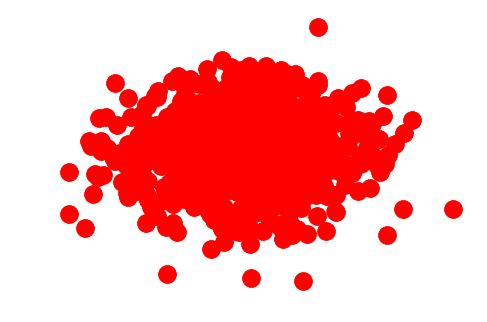

In [72]:
import matplotlib.pyplot as plt

G_Align=nx.Graph()
elist = unique_xmap
G_Align.add_weighted_edges_from(elist)
nx.draw(G_Align)
plt.show()

## compare node and edge connectivity
## compute largest connected component

In [60]:
print('Aligned graph have ',G_Align.number_of_nodes(),' nodes.')
print('Aligned graph have ',G_Align.number_of_edges(),' edges.')

Aligned graph have  2814  nodes.
Aligned graph have  4917  edges.


In [61]:
print('Target graph have ',G_target_na.number_of_nodes(),' nodes.')
print('Target graph have ',G_target_na.number_of_edges(), ' edges.')

Target graph have  2934  nodes.
Target graph have  9496  edges.


In [62]:
sum_weight=0
for i in range(len(unique_xmap)):
    sum_weight=sum_weight+ unique_xmap[i][2]
total_weight=0    
for i in range(len(nd1)):
    for j in range(len(nd2)):
        temp=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
        if(temp!=None):
            total_weight=total_weight+int(list(temp.values())[0])
print('Maximum Weight in Aligned graph: ',sum_weight) 
print('Total Weight in Target: ',total_weight)

Maximum Weight in Aligned graph:  678072
Total Weight in Target:  1059791


In [63]:
# returns number of different connected components 
print('number of different connected components in Aligned graph: ',nx.number_connected_components(G_Align)) 
print('number of different connected components in Target graph: ',nx.number_connected_components(G_target_na))  

number of different connected components in Aligned graph:  535
number of different connected components in Target graph:  521


In [64]:
# returns list of nodes in different connected components 
cc_align=list(nx.connected_components(G_Align))
cc_target=list(nx.connected_components(G_target_na))
print(list(nx.connected_components(G_Align))) 
print(list(nx.connected_components(G_target_na)))

[{'sc3134', 'sc2628', 'sc3089', 'ce8270', 'ce7655', 'sc2415', 'sc698', 'sc2710', 'sc1019', 'ce8307', 'ce8310', 'sc2330', 'sc3226'}, {'ce788', 'sc3266', 'ce10379', 'sc1910', 'ce311', 'ce3069', 'sc4934', 'sc1260', 'ce5218', 'sc5924', 'sc209', 'ce7380', 'ce13945', 'sc678', 'sc2495', 'ce404', 'sc5198', 'sc1358', 'ce2760', 'sc372', 'ce14200', 'sc2083', 'ce778', 'ce686', 'sc1933', 'ce2517', 'sc2363', 'ce10318', 'sc188', 'sc4420', 'ce1560', 'sc2630', 'sc1306', 'ce4108', 'ce166', 'ce1697', 'ce322', 'sc2198', 'ce3070', 'ce1814', 'sc2160', 'sc1152', 'sc3814', 'sc527', 'ce327', 'sc447', 'sc1325', 'sc1964', 'sc1960', 'ce3411', 'ce1883', 'sc106', 'ce27', 'sc1750', 'ce7712', 'ce1784', 'sc4498', 'ce1957', 'sc940', 'sc1183', 'ce1780', 'sc786', 'sc241', 'sc1353', 'sc65', 'ce3851', 'ce2312', 'ce6340', 'sc3287', 'sc37', 'sc295', 'sc2904', 'ce602', 'sc2060', 'sc2104', 'sc2091', 'sc5053', 'sc5006', 'ce600', 'sc423', 'ce12643', 'ce9381', 'sc3894', 'sc2026', 'sc4840', 'ce2820', 'ce1695', 'ce8498', 'sc2667', 

In [65]:
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(G_Align)) 
print(nx.node_connectivity(G_target_na))
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(G_Align))
print(nx.edge_connectivity(G_target_na))

0
0
0
0


## check similarity of connected components

In [66]:
count=0
for i in range(len(cc_align)):
    for j in range(len(cc_target)):
        if(cc_align[i]==cc_target[j]):
            count=count+1
print(count)

514


In [67]:
Gc = max(nx.connected_component_subgraphs(G_Align), key=len)
print('Largest common connected graph in Aligned graph: ',len(Gc))
Gct = max(nx.connected_component_subgraphs(G_target_na), key=len)
print('Largest common connected graph in Target graph: ',len(Gct))

Largest common connected graph in Aligned graph:  791
Largest common connected graph in Target graph:  1053


### check for mistake align

In [55]:
for i in range(len(unique_xmap)):
    if (G_target_na.has_edge(unique_xmap[i][0], unique_xmap[i][1])==False):
        print(unique_xmap[i])
        print(i)
print('no exist error')    

no exist error


# draw graphs

In [0]:
nx.draw_networkx(G1, with_labels = True)

In [0]:
nx.draw_networkx(G2)

In [0]:
import matplotlib.pyplot as plt
nx.draw(G_target_na)
plt.show()

In [68]:
# total ec
total_ec=G_target_na.number_of_edges()/G1.number_of_edges()*100
ratio_ec=score_ec_temp/total_ec*100
print("total EC: ",total_ec)
print("ratio EC: ",ratio_ec)

total EC:  94.2250446517166
ratio EC:  51.77969671440608


In [69]:
# total ics
total_ics=G_target_na.number_of_edges()/count_induced*100
ratio_ics=score_ics_temp/total_ics*100
print("total ICS: ",total_ics)
print("ratio ICS: ",ratio_ics)

total ICS:  119.98989133181703
ratio ICS:  51.779696714406064


In [70]:
# total s3
total_s3=(G_target_na.number_of_edges()/(G1.number_of_edges()+count_induced-G_target_na.number_of_edges()))*100
ratio_s3=score_s3_temp/total_s3*100
print("total S3: ",total_s3)
print("ratio S3: ",ratio_s3)

total S3:  111.77024482109228
ratio S3:  33.645912297177354


# compute FC

In [1]:
import pickle
with open('ce-sc-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

In [2]:
tree=[[unique_xmap[i][0],unique_xmap[i][1]] for i in range(len(unique_xmap))]
tree

[['ce8', 'sc362'],
 ['ce3511', 'sc1166'],
 ['ce16627', 'sc4955'],
 ['ce5341', 'sc1835'],
 ['ce27', 'sc59'],
 ['ce1297', 'sc944'],
 ['ce68', 'sc1306'],
 ['ce13710', 'sc4297'],
 ['ce2257', 'sc1018'],
 ['ce379', 'sc3619'],
 ['ce10201', 'sc742'],
 ['ce1428', 'sc2300'],
 ['ce8860', 'sc1735'],
 ['ce134', 'sc28'],
 ['ce5875', 'sc2834'],
 ['ce1523', 'sc780'],
 ['ce692', 'sc647'],
 ['ce958', 'sc384'],
 ['ce10636', 'sc3267'],
 ['ce2218', 'sc48'],
 ['ce7922', 'sc401'],
 ['ce8786', 'sc3255'],
 ['ce11698', 'sc3239'],
 ['ce5404', 'sc5638'],
 ['ce8338', 'sc1939'],
 ['ce3854', 'sc260'],
 ['ce7433', 'sc1031'],
 ['ce1523', 'sc531'],
 ['ce2874', 'sc1634'],
 ['ce10261', 'sc1612'],
 ['ce3853', 'sc855'],
 ['ce4681', 'sc842'],
 ['ce3908', 'sc2151'],
 ['ce11034', 'sc3774'],
 ['ce10378', 'sc3594'],
 ['ce622', 'sc1367'],
 ['ce2464', 'sc1601'],
 ['ce1309', 'sc317'],
 ['ce1848', 'sc446'],
 ['ce1792', 'sc148'],
 ['ce15859', 'sc4997'],
 ['ce1309', 'sc1122'],
 ['ce14260', 'sc4112'],
 ['ce814', 'sc2867'],
 ['ce14375'

# load ontology and create DAG graph

In [3]:
import pandas as pd
f=open('go.dag.obo.txt').readlines()
df=pd.DataFrame(f)
df

0
0                                GO:0046431 GO:0019599\n
1                                GO:0046430 GO:0019595\n
2                                GO:0046432 GO:0019361\n
3                                GO:0034198 GO:0060733\n
4                                GO:0046343 GO:0019872\n
5                                GO:0034193 GO:0034195\n
6                                GO:0034192 GO:0034194\n
7                                GO:0034190 GO:0034191\n
8                     GO:0046437 GO:0030632 GO:0070179\n
9                                GO:0046340 GO:0046342\n
10     GO:0030852 GO:0045658 GO:0030853 GO:0045643 GO...
11         GO:0030853 GO:0045659 GO:0045644 GO:0045641\n
12         GO:0030851 GO:0030221 GO:0030223 GO:0030222\n
13     GO:0030856 GO:0003339 GO:0030860 GO:0045601 GO...
14     GO:0030857 GO:0045602 GO:0030861 GO:0045617 GO...
15         GO:0030854 GO:0045645 GO:0045642 GO:0045660\n
16     GO:0030855 GO:0030859 GO:0030216 GO:0072192 GO...
17         GO:0030858 GO:0045603 GO:0030862 GO:0045618\n
18                               GO:0030859 GO:0045198\n
19                               GO:0031106 GO:0032186\n
20                    GO:0031105 GO:0032151 GO:0032152\n
21         GO:0031103 GO:0014814 GO:0048673 GO:0014012\n
22                    GO:0031102 GO:0031104 GO:0031103\n
23                    GO:0031109 GO:0046785 GO:0007019\n
24                    GO:0050832 GO:0009817 GO:0019732\n
25                               GO:0050833 GO:0005477\n
26                               GO:0050831 GO:0006962\n
27                               GO:0034776 GO:0071420\n
28                    GO:0045354 GO:0045355 GO:0045356\n
29                    GO:0030557 GO:0030560 GO:0030564\n
...                                                  ...
11284                 GO:0015732 GO:0032310 GO:0071720\n
11285  GO:0048338 GO:0048381 GO:0048402 GO:0048352 GO...
11286                            GO:0015730 GO:0015731\n
11287                 GO:0015736 GO:0015738 GO:0015737\n
11288                            GO:0015735 GO:0015736\n
11289                            GO:0052068 GO:0052069\n
11290                            GO:0070629 GO:0070630\n
11291                 GO:0052065 GO:0052265 GO:0052389\n
11292  GO:0070252 GO:0006932 GO:0033275 GO:0060327 GO...
11293                            GO:0043454 GO:0019487\n
11294  GO:0043455 GO:0043456 GO:0010371 GO:0009962 GO...
11295      GO:0042548 GO:0043155 GO:0042549 GO:0042550\n
11296      GO:0043450 GO:0009811 GO:0019370 GO:0009693\n
11297  GO:0043451 GO:0042184 GO:0042216 GO:0019337 GO...
11298      GO:0043452 GO:0043454 GO:0018864 GO:0043453\n
11299                            GO:0016427 GO:0016428\n
11300                 GO:0016426 GO:0016430 GO:0016429\n
11301                            GO:0001565 GO:0001566\n
11302  GO:0016423 GO:0004809 GO:0008176 GO:0009020 GO...
11303  GO:0016421 GO:0004658 GO:0004485 GO:0047925 GO...
11304      GO:0016420 GO:0050736 GO:0050735 GO:0016419\n
11305      GO:0045676 GO:0045501 GO:0045678 GO:0045677\n
11306                 GO:0070259 GO:0070260 GO:0017005\n
11307                            GO:0019191 GO:0022874\n
11308                            GO:0019196 GO:0022876\n
11309                            GO:0019194 GO:0022871\n
11310                            GO:0019198 GO:0005001\n
11311      GO:0019199 GO:0004675 GO:0004714 GO:0009784\n
11312                 GO:0070255 GO:0070256 GO:0070257\n
11313                 GO:0045679 GO:0045681 GO:0045680\n

[11314 rows x 1 columns]

In [4]:
# preprocessing
dag_list=[]
for i in range(len(df[0])):
    m1=str(df[0][i])
    m1=m1.replace('GO:','')
    m1=m1.replace('\n','')
    s=m1.split(' ')
    dag_list.append(s)
dag_list

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658', '0030853', '0045643', '0030854', '0045640'],
 ['0030853', '0045659', '0045644', '0045641'],
 ['0030851', '0030221', '0030223', '0030222'],
 ['0030856',
  '0003339',
  '0030860',
  '0045601',
  '0030857',
  '0072182',
  '0030858',
  '0045616'],
 ['0030857', '0045602', '0030861', '0045617', '0072183'],
 ['0030854', '0045645', '0045642', '0045660'],
 ['0030855',
  '0030859',
  '0030216',
  '0072192',
  '0060671',
  '0072160',
  '0060742',
  '0035026',
  '0072311',
  '0060487',
  '0045446',
  '0060644',
  '0002065'],
 ['0030858', '0045603', '0030862', '0045618'],
 ['0030859', '0045198'],
 ['0031106', '0032186'],
 ['0031105', '0032151', '0032152'],
 ['0031103', '0014814', '0048673', '0014012'],
 ['0031102', '00

In [5]:
dag_nd=[]
for i in range(len(dag_list)):
    for j in range(len(dag_list[i])):
        dag_nd.append(dag_list[i][j])
dag_nodes=set(dag_nd)
print(dag_nodes)
print(len(dag_nodes))

{'0034412', '0003027', '0006953', '0003151', '0009240', '0005852', '0032331', '0015857', '0042343', '0071314', '0010243', '0016322', '0015795', '0000734', '0048672', '0044173', '0004707', '0019098', '0008928', '0007032', '0016979', '0051726', '0043487', '0080123', '0034812', '0018556', '0009725', '0042862', '0007139', '0005721', '0030352', '0017193', '0003088', '0046147', '0006355', '0004968', '0016360', '0070600', '0033372', '0030391', '0042757', '0035501', '0045945', '0043589', '0005251', '0002668', '0003336', '0007486', '0015368', '0009811', '0030944', '0090020', '0060090', '0051420', '0043701', '0010932', '0006674', '0042286', '0043145', '0004572', '0071040', '0070139', '0015098', '0033926', '0030809', '0034369', '0018490', '0006610', '0007580', '0002824', '0004167', '0015028', '0021831', '0015374', '0035260', '0031203', '0050282', '0031403', '0018481', '0070306', '0048136', '0061121', '0002921', '0032958', '0015695', '0007621', '0010210', '0015742', '0030661', '0047446', '0000704'

In [6]:
# create dag edges
dag_edges=[]
for i in range(len(dag_list)):
    for j in range(1,len(dag_list[i])):
        ed=[dag_list[i][0],dag_list[i][j]]
        dag_edges.append(ed)
dag_edges

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632'],
 ['0046437', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658'],
 ['0030852', '0030853'],
 ['0030852', '0045643'],
 ['0030852', '0030854'],
 ['0030852', '0045640'],
 ['0030853', '0045659'],
 ['0030853', '0045644'],
 ['0030853', '0045641'],
 ['0030851', '0030221'],
 ['0030851', '0030223'],
 ['0030851', '0030222'],
 ['0030856', '0003339'],
 ['0030856', '0030860'],
 ['0030856', '0045601'],
 ['0030856', '0030857'],
 ['0030856', '0072182'],
 ['0030856', '0030858'],
 ['0030856', '0045616'],
 ['0030857', '0045602'],
 ['0030857', '0030861'],
 ['0030857', '0045617'],
 ['0030857', '0072183'],
 ['0030854', '0045645'],
 ['0030854', '0045642'],
 ['0030854', '0045660'],
 ['0030855', '0030859'],
 ['0030855', '0030216'],
 ['0030855', '0072192'],
 ['0030855', '0060671'],


In [7]:
import networkx as nx
go=nx.DiGraph()
go.add_nodes_from(dag_nodes)
go.add_edges_from(dag_edges)
go

In [10]:
c=0
import numpy as np
na=tree
for i in range(len(tree)):
    for j in range(2):
        if ('ce' in tree[i][j] or 'sc' in tree[i][j]):
            s=tree[i][j][2:]
            x='0'*(7-len(s))
            y=x+s
            #print(y)
            na[i][j]=y
            c=c+1
print(len(tree),c)
print(len(na))

4966 9932
4966


In [11]:
fc=[]
for i in range(len(na)):
    if na[i][0] in dag_nodes:
        e=go.predecessors(na[i][0])
        if na[i][1] in dag_nodes: 
            f=go.predecessors(na[i][1])
            temp=[]
            for key in e:
                temp.append(key)
            for key in f:
                temp.append(key)
            # compute intersection/union 
            fc.append(sum([temp.count(temp[z])/len(temp) for z in range(len(temp))]))
        else:
            fc.append(0)
#print(fc)
# compute average of all fc 
func=np.average(fc)
print('functional coherence:',func)

functional coherence: 0.676826007913592
